In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

plt.rcParams["figure.figsize"] = 15,10
%matplotlib inline
%config Completer.use_jedi=False

In [2]:
#Date stuff
from datetime import datetime
from datetime import timedelta

In [3]:
data_train = pd.read_csv(r"E:\DSP\DSP_22nd Nov\Machine Learning\FInal Class\Case Studies & FInal Projects\2\data\train.csv")
features = pd.read_csv(r"E:\DSP\DSP_22nd Nov\Machine Learning\FInal Class\Case Studies & FInal Projects\2\data\features.csv")
stores = pd.read_csv(r"E:\DSP\DSP_22nd Nov\Machine Learning\FInal Class\Case Studies & FInal Projects\2\data\stores.csv")

In [4]:
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [5]:
features.drop(["IsHoliday"],axis=1,inplace=True)

In [6]:
# data --> Train Data 
data = pd.merge(left = data_train,right=features,how="inner")

In [7]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [8]:
data = pd.merge(left=data,right=stores,how="inner")

In [9]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [10]:
data.shape

(421570, 16)

In [11]:
data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [12]:
data.shape

(421570, 16)

In [13]:
def scatter(data, column):
    plt.figure()
    plt.scatter(data[column] , data['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

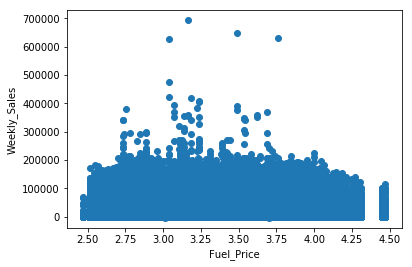

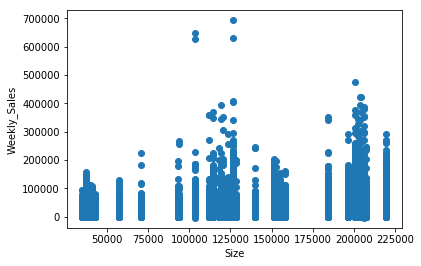

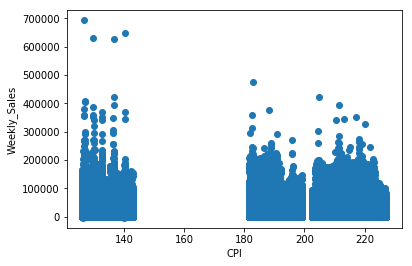

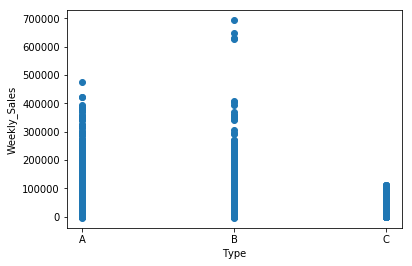

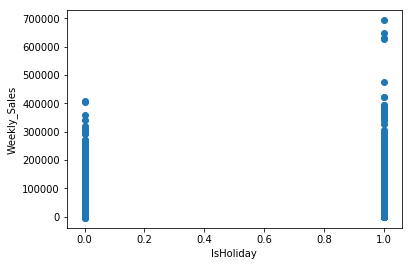

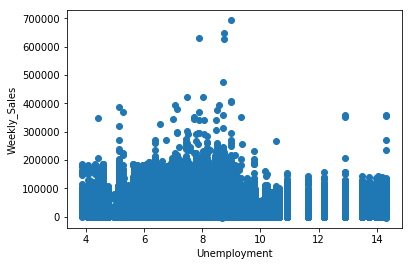

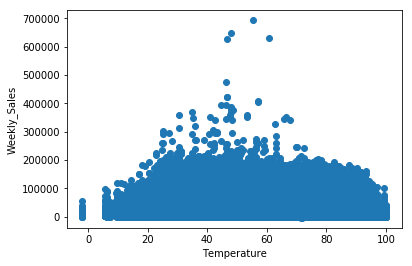

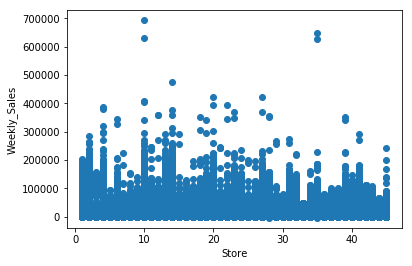

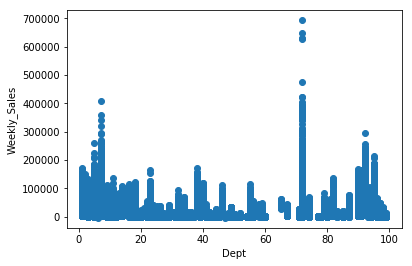

In [14]:
scatter(data, 'Fuel_Price')
scatter(data, 'Size')
scatter(data, 'CPI')
scatter(data, 'Type')
scatter(data, 'IsHoliday')
scatter(data, 'Unemployment')
scatter(data, 'Temperature')
scatter(data, 'Store')
scatter(data, 'Dept')

In [15]:
data.head() # Train Data is starting from 5th Feb , 2010 and ending on 26th Oct,2012

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


output = pandas_profiling.ProfileReport(data)
output.to_file(outputfile = "pandas_profiling1.html")

output_test = pandas_profiling.ProfileReport(data1)
output_test.to_file("pandas_profiling_test.html")

**Observations from Pandas Profiling Report (Train Data)**

1) All the variables in the data set are having CV > 0.1

2) None of the variables are having any correlation with another  variables 

3) Markdown's have got high number of missing values which is expected as per scenario and needs to be imputed with missing values


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [17]:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [18]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [19]:
data.Date = pd.to_datetime(data.Date)

In [20]:
data.Date.dtypes

dtype('<M8[ns]')

#### Adding New Variables (Derived Variables) in the data set for Train Data

In [21]:
data["Year"] = data.Date.dt.year

In [22]:
data["Month"] = data.Date.dt.month

In [23]:
data["Qurater"] = data.Date.dt.quarter

In [24]:
data["Week"] = data.Date.dt.week

In [25]:
np.where((data['Date'] == datetime(2010,2,12).date()),1,0)

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


array([0, 0, 0, ..., 0, 0, 0])

In [26]:
data["SuperBowl"] = np.where((data["Date"] == datetime(2010,2,12).date()),1,
                             np.where(data["Date"] == datetime(2011,2,11).date(),1,
                             np.where(data["Date"] == datetime(2012,2,10).date(),1,0)))

                             

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.
C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  
C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date'

In [27]:
data["LaborDay"] = np.where((data["Date"] == datetime(2010,9,10).date()),1,
                             np.where(data["Date"] == datetime(2011,9,9).date(),1,
                             np.where(data["Date"] == datetime(2012,9,7).date(),1,0)))


C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.
C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  
C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date'

In [28]:
data["ThanksGiving"] = np.where((data["Date"] == datetime(2010,11,26).date()),1,
                             np.where(data["Date"] == datetime(2011,11,25).date(),1,
                             np.where(data["Date"] == datetime(2012,11,23).date(),1,0)))


C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.
C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  
C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date'

In [29]:
data["Christmas"] = np.where((data["Date"] == datetime(2010,12,31).date()),1,
                             np.where(data["Date"] == datetime(2011,12,30).date(),1,
                             np.where(data["Date"] == datetime(2012,12,28).date(),1,0)))


C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.
C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  
C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date'

In [30]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Year,Month,Qurater,Week,SuperBowl,LaborDay,ThanksGiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,2010,2,1,5,0,0,0,0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,2010,2,1,5,0,0,0,0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,2010,2,1,5,0,0,0,0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,2010,2,1,5,0,0,0,0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,2010,2,1,5,0,0,0,0


In [31]:
data.Christmas.value_counts()

0    415624
1      5946
Name: Christmas, dtype: int64

In [32]:
data.SuperBowl.value_counts()

0    412675
1      8895
Name: SuperBowl, dtype: int64

In [33]:
data.ThanksGiving.value_counts()

0    415611
1      5959
Name: ThanksGiving, dtype: int64

In [34]:
data.LaborDay.value_counts()

0    412709
1      8861
Name: LaborDay, dtype: int64

####  The presence of Christmas and ThanksGiving counts are looking Similar whereas Counts of SuperBowl and LaborDay are looking Similar for the Train Data.

In [35]:
data.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Year                     int64
Month                    int64
Qurater                  int64
Week                     int64
SuperBowl                int32
LaborDay                 int32
ThanksGiving             int32
Christmas                int32
dtype: object

In [36]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Year,Month,Qurater,Week,SuperBowl,LaborDay,ThanksGiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,2010,2,1,5,0,0,0,0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,2010,2,1,5,0,0,0,0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,2010,2,1,5,0,0,0,0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,2010,2,1,5,0,0,0,0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,2010,2,1,5,0,0,0,0


In [37]:
Max_Weekly_Sales = data.groupby(["Store","Dept","Type","Week"])[["Weekly_Sales"]].max()
Max_Weekly_Sales.rename(columns={"Weekly_Sales":"max_weekly_sales"},inplace=True)

In [38]:
Max_Weekly_Sales

max_weekly_sales
Store Dept Type Week                  
1     1    A    1             16567.69
                2             17359.70
                3             18365.10
                4             18461.18
                5             24924.50
                6             46039.49
                7             54060.10
                8             20124.22
                9             21827.90
                10            21280.40
                11            22366.88
                12            26229.21
                13            57258.43
                14            57592.12
                15            34684.21
                16            50510.31
                17            41512.39
                18            20138.19
                19            18926.74
                20            18517.79
                21            16963.55
                22            17558.09
                23            17666.00
                24            17558.82
                25            16633.41
                26            16333.14
                27            17823.37
                28            17150.84
                29            16348.06
                30            15922.41
...                                ...
45    98   B    23              991.60
                24             1086.62
                25              737.36
                26             1005.98
                27             1021.94
                28             1033.14
                29              845.30
                30              657.63
                31              982.60
                32              827.40
                33              535.68
                34              415.40
                35              601.42
                36             1092.66
                37              791.96
                38              655.12
                39              727.05
                40              894.98
                41             1061.02
                42             1058.84
                43             1167.90
                44              749.18
                45              897.22
                46              503.20
                47              794.62
                48              538.51
                49              665.96
                50              853.46
                51             1084.78
                52              553.21

[159167 rows x 1 columns]

In [39]:
data = data.merge(Max_Weekly_Sales,on=["Store","Dept","Type","Week"])

In [40]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Size,Year,Month,Qurater,Week,SuperBowl,LaborDay,ThanksGiving,Christmas,max_weekly_sales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,151315,2010,2,1,5,0,0,0,0,24924.50
1,1,1,2011-02-04,21665.76,False,42.27,2.989,NaN,NaN,NaN,...,151315,2011,2,1,5,0,0,0,0,24924.50
2,1,1,2012-02-03,23510.49,False,56.55,3.360,34577.06,3579.21,160.53,...,151315,2012,2,1,5,0,0,0,0,24924.50
3,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,151315,2010,2,1,5,0,0,0,0,54322.24
4,1,2,2011-02-04,46829.12,False,42.27,2.989,NaN,NaN,NaN,...,151315,2011,2,1,5,0,0,0,0,54322.24


In [41]:
Min_Weekly_Sales = data.groupby(["Store","Dept","Type","Week"])[["Weekly_Sales"]].min()
Min_Weekly_Sales.rename(columns={"Weekly_Sales":"min_weekly_sales"},inplace=True)

In [42]:
data = data.merge(Min_Weekly_Sales,on=["Store","Dept","Type","Week"])

In [43]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Year,Month,Qurater,Week,SuperBowl,LaborDay,ThanksGiving,Christmas,max_weekly_sales,min_weekly_sales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,2010,2,1,5,0,0,0,0,24924.50,21665.76
1,1,1,2011-02-04,21665.76,False,42.27,2.989,NaN,NaN,NaN,...,2011,2,1,5,0,0,0,0,24924.50,21665.76
2,1,1,2012-02-03,23510.49,False,56.55,3.360,34577.06,3579.21,160.53,...,2012,2,1,5,0,0,0,0,24924.50,21665.76
3,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,2010,2,1,5,0,0,0,0,54322.24,46829.12
4,1,2,2011-02-04,46829.12,False,42.27,2.989,NaN,NaN,NaN,...,2011,2,1,5,0,0,0,0,54322.24,46829.12


In [44]:
Mean_Weekly_Sales = data.groupby(["Store","Dept","Type","Week"])[["Weekly_Sales"]].mean()
Mean_Weekly_Sales.rename(columns={"Weekly_Sales":"mean_weekly_sales"},inplace=True)

In [45]:
data = data.merge(Mean_Weekly_Sales,on=["Store","Dept","Type","Week"])

In [46]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Month,Qurater,Week,SuperBowl,LaborDay,ThanksGiving,Christmas,max_weekly_sales,min_weekly_sales,mean_weekly_sales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,2,1,5,0,0,0,0,24924.50,21665.76,23366.916667
1,1,1,2011-02-04,21665.76,False,42.27,2.989,NaN,NaN,NaN,...,2,1,5,0,0,0,0,24924.50,21665.76,23366.916667
2,1,1,2012-02-03,23510.49,False,56.55,3.360,34577.06,3579.21,160.53,...,2,1,5,0,0,0,0,24924.50,21665.76,23366.916667
3,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,2,1,5,0,0,0,0,54322.24,46829.12,50585.543333
4,1,2,2011-02-04,46829.12,False,42.27,2.989,NaN,NaN,NaN,...,2,1,5,0,0,0,0,54322.24,46829.12,50585.543333


In [47]:
Median_Weekly_Sales = data.groupby(["Store","Dept","Type","Week"])[["Weekly_Sales"]].median()
Median_Weekly_Sales.rename(columns={"Weekly_Sales":"median_weekly_sales"},inplace=True)

In [48]:
data = data.merge(Median_Weekly_Sales,on=["Store","Dept","Type","Week"])

In [49]:
Std_Weekly_Sales = data.groupby(["Store","Dept","Type","Week"])[["Weekly_Sales"]].std()
Std_Weekly_Sales.rename(columns={"Weekly_Sales":"std_weekly_sales"},inplace=True)

In [50]:
data = data.merge(Std_Weekly_Sales,on=["Store","Dept","Type","Week"])

In [51]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Week,SuperBowl,LaborDay,ThanksGiving,Christmas,max_weekly_sales,min_weekly_sales,mean_weekly_sales,median_weekly_sales,std_weekly_sales
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,5,0,0,0,0,24924.50,21665.76,23366.916667,23510.49,1634.107271
1,1,1,2011-02-04,21665.76,False,42.27,2.989,NaN,NaN,NaN,...,5,0,0,0,0,24924.50,21665.76,23366.916667,23510.49,1634.107271
2,1,1,2012-02-03,23510.49,False,56.55,3.360,34577.06,3579.21,160.53,...,5,0,0,0,0,24924.50,21665.76,23366.916667,23510.49,1634.107271
3,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,5,0,0,0,0,54322.24,46829.12,50585.543333,50605.27,3746.598950
4,1,2,2011-02-04,46829.12,False,42.27,2.989,NaN,NaN,NaN,...,5,0,0,0,0,54322.24,46829.12,50585.543333,50605.27,3746.598950


In [52]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month',
       'Qurater', 'Week', 'SuperBowl', 'LaborDay', 'ThanksGiving', 'Christmas',
       'max_weekly_sales', 'min_weekly_sales', 'mean_weekly_sales',
       'median_weekly_sales', 'std_weekly_sales'],
      dtype='object')

In [53]:
num_var_names = ['Weekly_Sales', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Year', 'SuperBowl', 'LaborDay', 'ThanksGiving',
       'Christmas', 'max_weekly_sales', 'min_weekly_sales', 'mean_weekly_sales',
       'median_weekly_sales', 'std_weekly_sales']

In [54]:
cat_var_names = ['Store', 'Dept','IsHoliday','Type',"Month","Week","Qurater"]

In [55]:
data_num = data[num_var_names]

In [56]:
data_cat = data[cat_var_names]

In [57]:
data_num.info()  # 21 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
Weekly_Sales           421570 non-null float64
Temperature            421570 non-null float64
Fuel_Price             421570 non-null float64
MarkDown1              150681 non-null float64
MarkDown2              111248 non-null float64
MarkDown3              137091 non-null float64
MarkDown4              134967 non-null float64
MarkDown5              151432 non-null float64
CPI                    421570 non-null float64
Unemployment           421570 non-null float64
Size                   421570 non-null int64
Year                   421570 non-null int64
SuperBowl              421570 non-null int32
LaborDay               421570 non-null int32
ThanksGiving           421570 non-null int32
Christmas              421570 non-null int32
max_weekly_sales       421570 non-null float64
min_weekly_sales       421570 non-null float64
mean_weekly_sales      421570 non-null float64
median_w

In [58]:
data_cat.info() # 7 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 7 columns):
Store        421570 non-null int64
Dept         421570 non-null int64
IsHoliday    421570 non-null bool
Type         421570 non-null object
Month        421570 non-null int64
Week         421570 non-null int64
Qurater      421570 non-null int64
dtypes: bool(1), int64(5), object(1)
memory usage: 22.9+ MB


In [59]:
data_num.isnull().sum()

Weekly_Sales                0
Temperature                 0
Fuel_Price                  0
MarkDown1              270889
MarkDown2              310322
MarkDown3              284479
MarkDown4              286603
MarkDown5              270138
CPI                         0
Unemployment                0
Size                        0
Year                        0
SuperBowl                   0
LaborDay                    0
ThanksGiving                0
Christmas                   0
max_weekly_sales            0
min_weekly_sales            0
mean_weekly_sales           0
median_weekly_sales         0
std_weekly_sales         7031
dtype: int64

In [60]:
data_num.std_weekly_sales = data_num.std_weekly_sales.fillna(data_num.std_weekly_sales.mean())

C:\Users\Akhtar\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [61]:
data_num.isnull().sum()

Weekly_Sales                0
Temperature                 0
Fuel_Price                  0
MarkDown1              270889
MarkDown2              310322
MarkDown3              284479
MarkDown4              286603
MarkDown5              270138
CPI                         0
Unemployment                0
Size                        0
Year                        0
SuperBowl                   0
LaborDay                    0
ThanksGiving                0
Christmas                   0
max_weekly_sales            0
min_weekly_sales            0
mean_weekly_sales           0
median_weekly_sales         0
std_weekly_sales            0
dtype: int64

In [62]:
data_cat.isnull().sum()

Store        0
Dept         0
IsHoliday    0
Type         0
Month        0
Week         0
Qurater      0
dtype: int64

In [63]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [64]:
data_num = data_num.apply(lambda x:outlier_capping(x))

In [65]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(0)
    return x

In [66]:
data_num = data_num.apply(lambda x:Missing_imputation(x))

In [67]:
data_num.isnull().sum()

Weekly_Sales           0
Temperature            0
Fuel_Price             0
MarkDown1              0
MarkDown2              0
MarkDown3              0
MarkDown4              0
MarkDown5              0
CPI                    0
Unemployment           0
Size                   0
Year                   0
SuperBowl              0
LaborDay               0
ThanksGiving           0
Christmas              0
max_weekly_sales       0
min_weekly_sales       0
mean_weekly_sales      0
median_weekly_sales    0
std_weekly_sales       0
dtype: int64

In [68]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_num.apply(lambda x: var_summary(x)).T

In [69]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Weekly_Sales,421570.0,0.0,6.599483e+09,15654.535929,7612.030000,20781.670902,4.318778e+08,5.000000,5.000000,59.974500,291.097000,2079.650000,7612.030000,20205.852500,42845.673000,61201.951000,106477.746460,106479.586000
Temperature,421570.0,0.0,2.533977e+07,60.108106,62.090000,18.297286,3.347907e+02,18.300000,18.300000,27.310000,33.980000,46.680000,62.090000,74.280000,83.580000,87.270000,92.810000,92.810000
Fuel_Price,421570.0,0.0,1.416587e+06,3.360265,3.452000,0.456205,2.081234e-01,2.565000,2.565000,2.653000,2.720000,2.933000,3.452000,3.738000,3.917000,4.029000,4.202000,4.202000
MarkDown1,421570.0,0.0,1.069989e+09,2538.106341,0.000000,5591.691341,3.126701e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2809.050000,8624.560000,12407.710000,28177.290000,41524.030000
MarkDown2,421570.0,0.0,3.498977e+08,829.987275,0.000000,4366.111336,1.906293e+07,-0.990000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000,452.880000,3789.560000,21813.160000,50366.600000
MarkDown3,421570.0,0.0,1.690173e+08,400.923518,0.000000,4427.011571,1.959843e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.540000,74.410000,216.170000,2083.280000,63143.290000
MarkDown4,421570.0,0.0,4.408980e+08,1045.847628,0.000000,3458.343597,1.196014e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,425.290000,2828.890000,5163.630000,16822.460000,35785.260000
MarkDown5,421570.0,0.0,6.733077e+08,1597.143297,0.000000,3314.282793,1.098447e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2168.040000,5284.630000,7456.150000,15590.530000,27754.230000
CPI,421570.0,0.0,7.217089e+07,171.195504,182.318780,39.149643,1.532695e+03,126.111903,126.111903,126.496258,128.823806,132.022667,182.318780,212.416993,219.444244,221.941558,225.473509,225.473509
Unemployment,421570.0,0.0,3.355685e+06,7.959971,7.866000,1.859419,3.457438e+00,4.156000,4.156000,5.326000,5.965000,6.891000,7.866000,8.572000,9.816000,12.187000,14.180000,14.180000


#### Converting the Categorical Variables of Train and Test data into Contionuous ones

In [70]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_cat.columns:
    data_cat[c_feature] = data_cat[c_feature].astype('category')
    data_cat = create_dummies(data_cat , c_feature )

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [71]:
data_cat.info() # 192 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Columns: 192 entries, Store_2 to Qurater_4
dtypes: uint8(192)
memory usage: 80.4 MB


In [72]:
data_cat.head()

,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,...,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Qurater_2,Qurater_3,Qurater_4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
data_num.head() # 21 columns

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Year,SuperBowl,LaborDay,ThanksGiving,Christmas,max_weekly_sales,min_weekly_sales,mean_weekly_sales,median_weekly_sales,std_weekly_sales
0,24924.50,42.31,2.572,0.00,0.00,0.00,0.00,0.0,211.096358,8.106,...,2010.0,0.0,0.0,0.0,0.0,24924.50,21665.76,23366.916667,23510.49,1634.107271
1,21665.76,42.27,2.989,0.00,0.00,0.00,0.00,0.0,212.566881,7.742,...,2011.0,0.0,0.0,0.0,0.0,24924.50,21665.76,23366.916667,23510.49,1634.107271
2,23510.49,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.4,220.172015,7.348,...,2012.0,0.0,0.0,0.0,0.0,24924.50,21665.76,23366.916667,23510.49,1634.107271
3,50605.27,42.31,2.572,0.00,0.00,0.00,0.00,0.0,211.096358,8.106,...,2010.0,0.0,0.0,0.0,0.0,54322.24,46829.12,50585.543333,50605.27,3746.598950
4,46829.12,42.27,2.989,0.00,0.00,0.00,0.00,0.0,212.566881,7.742,...,2011.0,0.0,0.0,0.0,0.0,54322.24,46829.12,50585.543333,50605.27,3746.598950


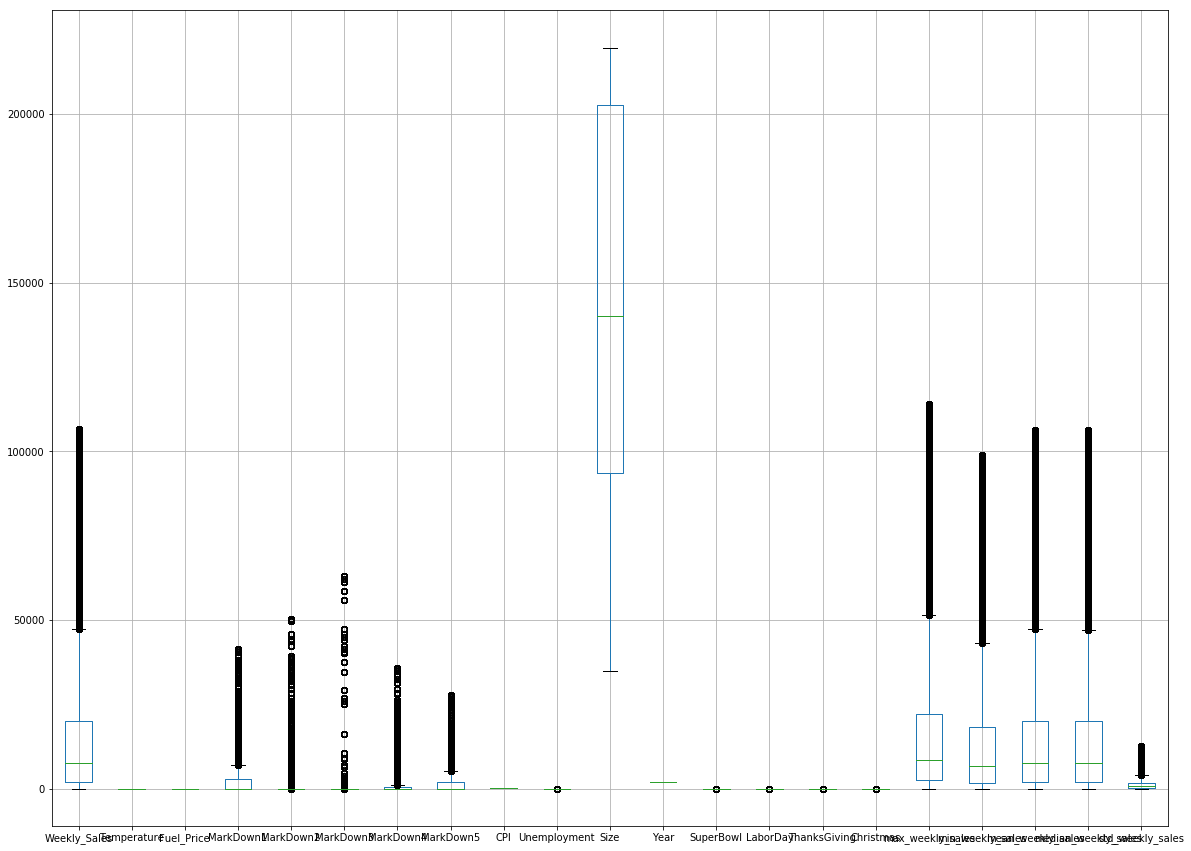

In [74]:
plt.subplots(figsize=(20,15))
data_num.boxplot()

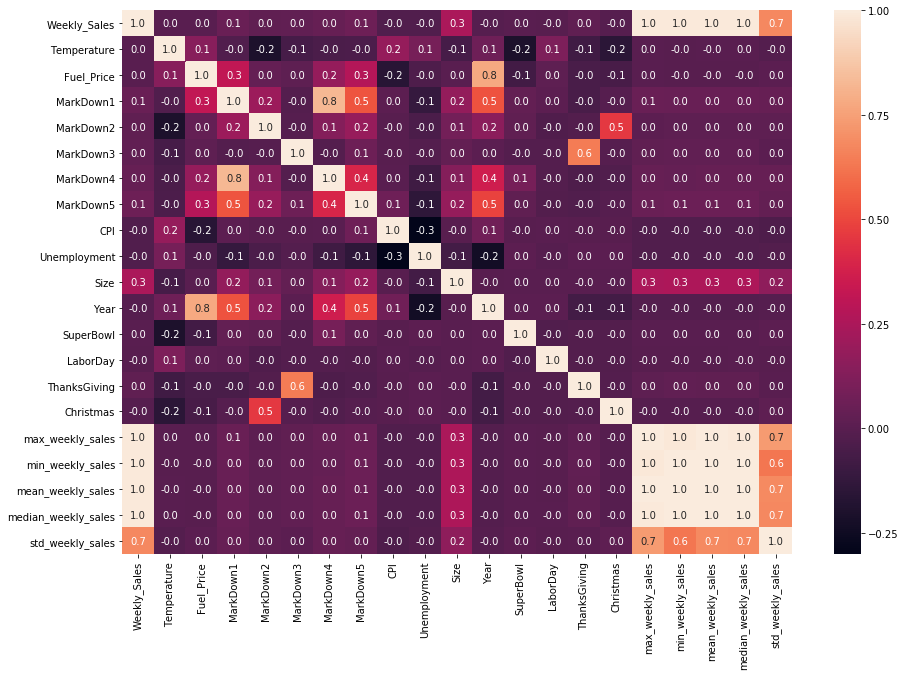

In [75]:
plt.subplots(figsize=(15,10))
sns.heatmap(data_num.corr(),annot=True,fmt="1.1f")

In [76]:
data_new = pd.concat([data_num,data_cat],axis=1)

In [77]:
data_new.info() # 213 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Columns: 213 entries, Weekly_Sales to Qurater_4
dtypes: float64(21), uint8(192)
memory usage: 148.0 MB


In [78]:
data_new.head()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Qurater_2,Qurater_3,Qurater_4
0,24924.50,42.31,2.572,0.00,0.00,0.00,0.00,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
1,21665.76,42.27,2.989,0.00,0.00,0.00,0.00,0.0,212.566881,7.742,...,0,0,0,0,0,0,0,0,0,0
2,23510.49,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.4,220.172015,7.348,...,0,0,0,0,0,0,0,0,0,0
3,50605.27,42.31,2.572,0.00,0.00,0.00,0.00,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
4,46829.12,42.27,2.989,0.00,0.00,0.00,0.00,0.0,212.566881,7.742,...,0,0,0,0,0,0,0,0,0,0


### Assumptions of Linear Regression

C:\Users\Akhtar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


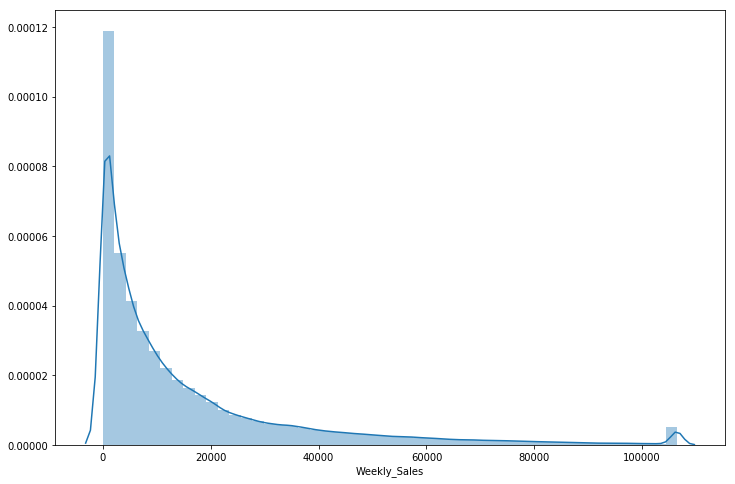

In [79]:
plt.subplots(figsize = (12,8))
sns.distplot(data_new.Weekly_Sales)

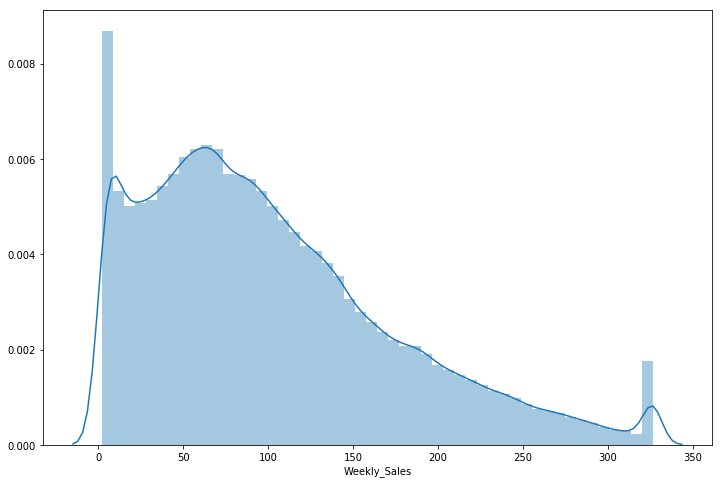

In [80]:
plt.subplots(figsize  = (12,8))
sns.distplot(np.sqrt(data_new.Weekly_Sales))

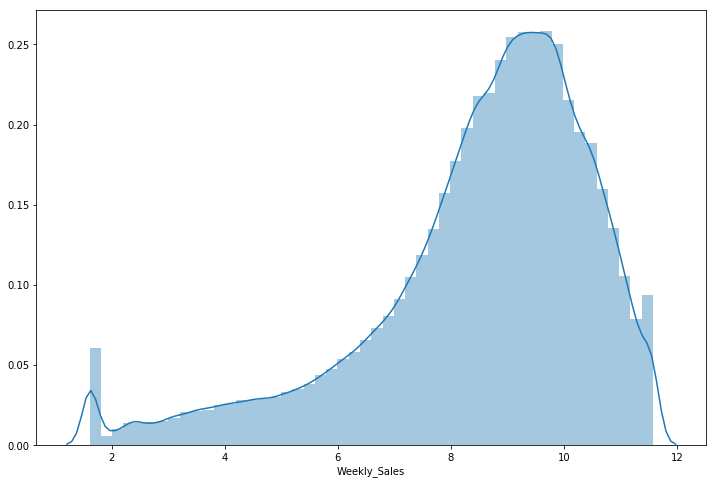

In [81]:
plt.subplots(figsize  = (12,8))
sns.distplot(np.log(data_new.Weekly_Sales))

In [82]:
data_new.head()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Qurater_2,Qurater_3,Qurater_4
0,24924.50,42.31,2.572,0.00,0.00,0.00,0.00,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
1,21665.76,42.27,2.989,0.00,0.00,0.00,0.00,0.0,212.566881,7.742,...,0,0,0,0,0,0,0,0,0,0
2,23510.49,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.4,220.172015,7.348,...,0,0,0,0,0,0,0,0,0,0
3,50605.27,42.31,2.572,0.00,0.00,0.00,0.00,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,0,0
4,46829.12,42.27,2.989,0.00,0.00,0.00,0.00,0.0,212.566881,7.742,...,0,0,0,0,0,0,0,0,0,0


In [83]:
import scipy.stats as stats

In [84]:
stats.anderson(data_num.Weekly_Sales,dist="norm")

AndersonResult(statistic=36218.36788309581, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [85]:
stats.anderson(np.log(data_num.Weekly_Sales),dist="norm")

AndersonResult(statistic=10088.682307256851, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [86]:
stats.anderson(np.sqrt(data_num.Weekly_Sales),dist="norm")

AndersonResult(statistic=6898.865667641105, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [87]:
stats.anderson(np.square(data_num.Weekly_Sales),dist="norm")

AndersonResult(statistic=86494.67336996982, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

corrm = data_new.corr()
corrm.to_csv("CM2.csv")

In [88]:
data_new['sqrt_weekly_sales'] = np.sqrt(data_new.Weekly_Sales)

### Feature Engineering (Variable Reduction)

### 1. RFE

In [89]:
features = data_new[data_new.columns.difference( ['sqrt_weekly_sales', 'Weekly_Sales'] )]
target = data_new['sqrt_weekly_sales']

In [90]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import itertools

lm = LinearRegression()

# create the RFE model and select 10 attributes
rfe = RFE(lm, n_features_to_select=25)
rfe = rfe.fit(features, target)

In [91]:
rfe.get_support()

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [92]:
RFE_features=features.columns[rfe.get_support()]

In [93]:
features1 = features[RFE_features]

In [94]:
features1.head()

,Christmas,IsHoliday_True,LaborDay,Month_10,Month_11,Month_12,Month_2,Qurater_4,SuperBowl,ThanksGiving,...,Week_47,Week_48,Week_49,Week_5,Week_50,Week_51,Week_52,Week_6,Week_7,Week_8
0,0.0,0,0.0,0,0,0,1,0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,1,0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,1,0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,1,0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,1,0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [95]:
features1.columns

Index(['Christmas', 'IsHoliday_True', 'LaborDay', 'Month_10', 'Month_11',
       'Month_12', 'Month_2', 'Qurater_4', 'SuperBowl', 'ThanksGiving',
       'Week_36', 'Week_38', 'Week_44', 'Week_45', 'Week_46', 'Week_47',
       'Week_48', 'Week_49', 'Week_5', 'Week_50', 'Week_51', 'Week_52',
       'Week_6', 'Week_7', 'Week_8'],
      dtype='object')

### 2. KBest

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [97]:
X = data_new[data_new.columns.difference(['sqrt_weekly_sales', 'Weekly_Sales'])]
X_new = SelectKBest(f_regression, k=25).fit(X, data_new[['sqrt_weekly_sales']] )

C:\Users\Akhtar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
X_new.get_support()

array([False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [99]:
X_new.scores_

array([3.36208174e+02, 1.54352465e+01, 5.15497236e+02, 9.78646485e+01,
       2.25103635e+03, 5.58358560e+03, 1.28345992e+02, 6.83352267e-01,
       1.18187389e+02, 1.75836242e+03, 3.38513170e+03, 1.19950693e+04,
       1.29840103e+03, 1.51769317e+03, 1.35191232e+01, 1.89408432e+03,
       7.18224405e+02, 3.35015262e+02, 4.57660930e+02, 4.45898306e+03,
       7.27521449e+03, 9.06215312e+02, 3.17971439e+01, 1.61402257e+03,
       3.89098825e+03, 7.91659378e+02, 6.57227403e+02, 3.33509438e+02,
       2.49501222e+03, 3.69292174e+03, 1.04066207e+03, 2.53189131e+04,
       2.87709296e+01, 3.63326796e+03, 1.34602497e+04, 4.10100234e+03,
       1.55241328e+03, 2.20657982e+01, 1.37256200e+03, 3.44526195e+03,
       1.25276057e+03, 1.09362087e+03, 1.52465448e+03, 4.50455354e+02,
       9.90913007e+02, 8.14102196e+02, 2.48553170e+03, 4.61927298e+03,
       7.84920495e+03, 3.20811625e+01, 3.01904137e+03, 1.84924995e+03,
       7.71715939e+03, 1.77452402e+03, 7.90746302e+03, 3.29340649e+02,
      

In [100]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=X.columns[X_new.get_support()]

selected_features_from_KBest = X[KBest_features]

In [101]:
KBest_features

Index(['Dept_13', 'Dept_2', 'Dept_27', 'Dept_28', 'Dept_38', 'Dept_40',
       'Dept_41', 'Dept_52', 'Dept_54', 'Dept_59', 'Dept_60', 'Dept_72',
       'Dept_8', 'Dept_90', 'Dept_91', 'Dept_92', 'Dept_95', 'Size', 'Type_B',
       'Type_C', 'max_weekly_sales', 'mean_weekly_sales',
       'median_weekly_sales', 'min_weekly_sales', 'std_weekly_sales'],
      dtype='object')

In [102]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(  features, target )

In [103]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

In [104]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [105]:
f_reg_result = f_reg_results.sort_values(by=['F_Value'], ascending=False)

In [106]:
f_reg_result[:40]

,Variable,F_Value,P_Value
208,mean_weekly_sales,3.346530e+06,0.000
209,median_weekly_sales,3.274647e+06,0.000
207,max_weekly_sales,3.270348e+06,0.000
210,min_weekly_sales,3.069543e+06,0.000
211,std_weekly_sales,3.229579e+05,0.000
104,Size,4.081475e+04,0.000
77,Dept_95,2.759996e+04,0.000
74,Dept_92,2.654352e+04,0.000
31,Dept_38,2.531891e+04,0.000
34,Dept_40,1.346025e+04,0.000


In [107]:
f_reg_result[40:100]

,Variable,F_Value,P_Value
126,Store_3,2629.666323,0.000
108,Store_13,2520.043280,0.000
28,Dept_35,2495.012222,0.000
46,Dept_51,2485.531698,0.000
135,Store_38,2406.786475,0.000
115,Store_2,2383.900709,0.000
4,Dept_12,2251.036351,0.000
105,Store_10,2232.831727,0.000
75,Dept_93,1922.362907,0.000
89,MarkDown5,1897.801201,0.000


In [108]:
f_reg_result[100:140]

,Variable,F_Value,P_Value
62,Dept_78,425.625247,0.000
124,Store_28,393.411113,0.000
120,Store_24,370.629523,0.000
154,Unemployment,362.122254,0.000
67,Dept_82,358.954792,0.000
0,CPI,336.208174,0.000
17,Dept_25,335.015262,0.000
27,Dept_34,333.509438,0.000
66,Dept_81,330.057078,0.000
55,Dept_65,329.340649,0.000


### VIF (To handle Multicollinearity)

In [109]:
# When used sqrt transformation of Weekly_Sales
list_vars = ['Christmas', 'IsHoliday_True', 'LaborDay', 'Month_10', 'Month_11',  # Selected from RFE
       'Month_12', 'Month_2', 'Qurater_4', 'SuperBowl', 'ThanksGiving',
       'Week_36', 'Week_38', 'Week_44', 'Week_45', 'Week_46', 'Week_47',
       'Week_48', 'Week_49', 'Week_5', 'Week_50', 'Week_51', 'Week_52',
       'Week_6', 'Week_7', 'Week_8',
            
            
            'Dept_13', 'Dept_2', 'Dept_27', 'Dept_28', 'Dept_38', 'Dept_40', # Selected from KBest
       'Dept_41', 'Dept_52', 'Dept_54', 'Dept_59', 'Dept_60', 'Dept_72',
       'Dept_8', 'Dept_90', 'Dept_91', 'Dept_92', 'Dept_95', 'Size', 'Type_B',
       'Type_C', 'max_weekly_sales', 'mean_weekly_sales',
       'median_weekly_sales', 'min_weekly_sales', 'std_weekly_sales']

In [110]:
list_vars

['Christmas',
 'IsHoliday_True',
 'LaborDay',
 'Month_10',
 'Month_11',
 'Month_12',
 'Month_2',
 'Qurater_4',
 'SuperBowl',
 'ThanksGiving',
 'Week_36',
 'Week_38',
 'Week_44',
 'Week_45',
 'Week_46',
 'Week_47',
 'Week_48',
 'Week_49',
 'Week_5',
 'Week_50',
 'Week_51',
 'Week_52',
 'Week_6',
 'Week_7',
 'Week_8',
 'Dept_13',
 'Dept_2',
 'Dept_27',
 'Dept_28',
 'Dept_38',
 'Dept_40',
 'Dept_41',
 'Dept_52',
 'Dept_54',
 'Dept_59',
 'Dept_60',
 'Dept_72',
 'Dept_8',
 'Dept_90',
 'Dept_91',
 'Dept_92',
 'Dept_95',
 'Size',
 'Type_B',
 'Type_C',
 'max_weekly_sales',
 'mean_weekly_sales',
 'median_weekly_sales',
 'min_weekly_sales',
 'std_weekly_sales']

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [112]:
all_columns = "+".join(list_vars)
my_formula = "sqrt_weekly_sales~" + all_columns
print(my_formula)

sqrt_weekly_sales~Christmas+IsHoliday_True+LaborDay+Month_10+Month_11+Month_12+Month_2+Qurater_4+SuperBowl+ThanksGiving+Week_36+Week_38+Week_44+Week_45+Week_46+Week_47+Week_48+Week_49+Week_5+Week_50+Week_51+Week_52+Week_6+Week_7+Week_8+Dept_13+Dept_2+Dept_27+Dept_28+Dept_38+Dept_40+Dept_41+Dept_52+Dept_54+Dept_59+Dept_60+Dept_72+Dept_8+Dept_90+Dept_91+Dept_92+Dept_95+Size+Type_B+Type_C+max_weekly_sales+mean_weekly_sales+median_weekly_sales+min_weekly_sales+std_weekly_sales


In [113]:
my_formula = 'sqrt_weekly_sales~Christmas+Month_12+Month_2+Qurater_4+SuperBowl+ThanksGiving+Week_38+Week_5+Week_50+Week_51+Dept_13+Dept_2+Dept_27+Dept_28+Dept_38+Dept_40+Dept_41+Dept_52+Dept_54+Dept_59+Dept_60+Dept_72+Dept_8+Dept_90+Dept_91+Dept_92+Dept_95+Size+Type_B+Type_C+median_weekly_sales+std_weekly_sales'

In [114]:
# get y and X dataframes based on this regression
y, X = dmatrices(my_formula, data_new, return_type='dataframe')

variance_inflation_factor(X.values, 1)

In [115]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,29.7,Intercept
1,1.5,Christmas
2,2.8,Month_12
3,1.9,Month_2
4,1.5,Qurater_4
5,1.5,SuperBowl
6,1.1,ThanksGiving
7,1.0,Week_38
8,1.5,Week_5
9,1.5,Week_50


In [189]:
vif.to_excel("VIF.xlsx")

### Model Building

### Train and test Data Preparation:
#### Considering the Last 1 year data as the Test Data and the rest data as Train Data 

#### TEst Data Prep:

In [116]:
test1 = data_new[(data_new.Year == 2012)]

In [117]:
test1.shape

(127438, 214)

In [118]:
test2 = data_new[(data_new.Year == 2011) & data_new.Qurater_4 == True]

In [119]:
test2.shape

(38768, 214)

In [120]:
test = pd.merge(left=test2,right=test1,how='outer')

In [121]:
127438 + 38768

166206

In [122]:
test.shape

(166206, 214)

#### Train DAta Prep:

In [123]:
train1 = data_new[data_new.Year == 2010]

In [124]:
train1.shape

(140679, 214)

In [125]:
train2 = data_new[-(data_new.Qurater_4 == True) & (data_new.Year == 2011)]

In [126]:
train2.shape

(114685, 214)

In [127]:
train = pd.merge(left = train1,right=train2,how='outer')

In [128]:
# Train Data for 2010 = 140679 , Train Data for 2011 (only Q1,Q2,Q3) = 114685
140679+114685

255364

In [129]:
# Test Data for 2011(only Q4)= 38768 ,Test Data for 2012 = 127438 
38768+127438

166206

In [130]:
train.shape

(255364, 214)

In [131]:
test.shape

(166206, 214)

In [132]:
train.shape + test.shape

(255364, 214, 166206, 214)

In [133]:
import statsmodels.formula.api as smf

In [134]:
my_formula

'sqrt_weekly_sales~Christmas+Month_12+Month_2+Qurater_4+SuperBowl+ThanksGiving+Week_38+Week_5+Week_50+Week_51+Dept_13+Dept_2+Dept_27+Dept_28+Dept_38+Dept_40+Dept_41+Dept_52+Dept_54+Dept_59+Dept_60+Dept_72+Dept_8+Dept_90+Dept_91+Dept_92+Dept_95+Size+Type_B+Type_C+median_weekly_sales+std_weekly_sales'

In [135]:
my_formula = 'sqrt_weekly_sales~Christmas+Month_12+Qurater_4+ThanksGiving+Week_38+Dept_13+Dept_2+Dept_27+Dept_28+Dept_38+Dept_40+Dept_41+Dept_52+Dept_54+Dept_59+Dept_60+Dept_72+Dept_8+Dept_90+Dept_91+Dept_92+Dept_95+Size+Type_B+Type_C+median_weekly_sales+std_weekly_sales'

In [136]:
model = smf.ols(my_formula, data=train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      sqrt_weekly_sales   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 9.915e+04
Date:                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                        00:21:33   Log-Likelihood:            -1.1454e+06
No. Observations:              255364   AIC:                         2.291e+06
Df Residuals:                  255336   BIC:                         2.291e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              37.9534    

In [137]:
list_vars2 = ['sqrt_weekly_sales','Christmas','Month_12','Month_2','Qurater_4','SuperBowl','ThanksGiving','Week_38','Week_5','Week_50','Week_51','Dept_13','Dept_2','Dept_27','Dept_28','Dept_38','Dept_40','Dept_41','Dept_52','Dept_54','Dept_59','Dept_60','Dept_72','Dept_8','Dept_90','Dept_91','Dept_92','Dept_95','Size','Type_B','Type_C','median_weekly_sales','std_weekly_sales']

In [138]:
final_model_corr = data_new[list_vars2]

In [140]:
final_model_corr = final_model_corr.corr()

In [141]:
final_model_corr

,sqrt_weekly_sales,Christmas,Month_12,Month_2,Qurater_4,SuperBowl,ThanksGiving,Week_38,Week_5,Week_50,...,Dept_8,Dept_90,Dept_91,Dept_92,Dept_95,Size,Type_B,Type_C,median_weekly_sales,std_weekly_sales
sqrt_weekly_sales,1.000000,-0.006051,0.036827,-0.000357,0.023574,0.002481,0.020262,-0.008782,-0.002055,0.022372,...,0.109057,0.159640,0.109146,0.243381,0.247885,0.297104,-0.117827,-0.152626,0.941247,0.658617
Christmas,-0.006051,1.000000,0.433665,-0.036284,0.226734,-0.017560,-0.014322,-0.017513,-0.017523,-0.014338,...,-0.000125,-0.000125,-0.000125,-0.000125,-0.000125,-0.000090,0.000124,-0.000187,-0.006515,0.016981
Month_12,0.036827,0.433665,1.000000,-0.083669,0.522832,-0.040493,-0.033026,-0.040383,-0.040407,0.434625,...,-0.000371,-0.000371,-0.000371,-0.000371,-0.000371,-0.000716,0.000666,-0.000654,0.040008,0.019251
Month_2,-0.000357,-0.036284,-0.083669,1.000000,-0.160030,0.483965,-0.036324,-0.044417,0.482936,-0.036365,...,-0.000159,-0.000159,-0.000159,-0.000159,-0.000159,0.001066,0.000756,-0.001153,-0.000285,0.018007
Qurater_4,0.023574,0.226734,0.522832,-0.160030,1.000000,-0.077449,0.226985,-0.077240,-0.077284,0.227236,...,-0.000277,-0.000277,-0.000277,-0.000277,-0.000277,-0.001204,0.001235,-0.001306,0.024976,-0.007456
SuperBowl,0.002481,-0.017560,-0.040493,0.483965,-0.077449,1.000000,-0.017580,-0.021496,-0.021509,-0.017599,...,-0.000105,-0.000105,-0.000105,-0.000105,-0.000105,0.000798,0.000281,-0.000864,0.002112,0.010960
ThanksGiving,0.020262,-0.014322,-0.033026,-0.036324,0.226985,-0.017580,1.000000,-0.017532,-0.017542,-0.014354,...,-0.000157,-0.000157,-0.000157,-0.000157,-0.000157,-0.000078,0.000411,-0.000675,0.022316,0.000704
Week_38,-0.008782,-0.017513,-0.040383,-0.044417,-0.077240,-0.021496,-0.017532,1.000000,-0.021451,-0.017552,...,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,-0.000087,0.000324,-0.000167,-0.009113,-0.011816
Week_5,-0.002055,-0.017523,-0.040407,0.482936,-0.077284,-0.021509,-0.017542,-0.021451,1.000000,-0.017562,...,-0.000029,-0.000029,-0.000029,-0.000029,-0.000029,0.000714,0.000294,-0.000441,-0.001126,0.017109
Week_50,0.022372,-0.014338,0.434625,-0.036365,0.227236,-0.017599,-0.014354,-0.017552,-0.017562,1.000000,...,-0.000190,-0.000190,-0.000190,-0.000190,-0.000190,-0.000642,0.000450,-0.000029,0.023420,0.007015


In [142]:
final_model_corr.to_excel("FInalModelCorr.xlsx")

In [143]:
data_cat.head()

,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,...,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Qurater_2,Qurater_3,Qurater_4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
data_new.corr()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Qurater_2,Qurater_3,Qurater_4,sqrt_weekly_sales
Weekly_Sales,1.000000,0.000733,0.001395,0.051658,0.020590,0.027211,0.041663,0.061344,-0.022697,-0.025362,...,0.021788,0.004624,0.014523,0.022829,0.048863,-0.006908,0.000645,-0.006740,0.022957,0.946376
Temperature,0.000733,1.000000,0.142258,-0.021467,-0.198941,-0.061415,-0.045769,-0.036161,0.184320,0.095296,...,-0.077645,-0.109049,-0.142320,-0.130912,-0.133057,-0.151807,0.175808,0.562417,-0.259448,-0.010507
Fuel_Price,0.001395,0.142258,1.000000,0.318962,0.036962,0.018456,0.184244,0.275005,-0.162609,-0.034938,...,-0.047113,-0.056086,-0.049080,-0.049011,-0.052721,-0.051571,0.189508,0.036298,-0.131825,0.000557
MarkDown1,0.051658,-0.021467,0.318962,1.000000,0.204484,-0.013537,0.826725,0.534427,0.012429,-0.113278,...,-0.048072,-0.005117,-0.003972,-0.019855,-0.042069,-0.009992,-0.028563,0.008003,-0.086717,0.060703
MarkDown2,0.020590,-0.198941,0.036962,0.204484,1.000000,-0.006568,0.136557,0.191881,-0.005539,-0.044057,...,-0.020332,-0.021667,-0.022394,-0.021926,-0.022013,0.458450,-0.084076,-0.114529,0.079383,0.024446
MarkDown3,0.027211,-0.061415,0.018456,-0.013537,-0.006568,1.000000,-0.012107,0.061555,-0.003211,-0.015011,...,0.640379,0.038017,-0.006220,-0.000883,0.004664,-0.008614,-0.051953,-0.054701,0.163792,0.027276
MarkDown4,0.041663,-0.045769,0.184244,0.826725,0.136557,-0.012107,1.000000,0.399079,0.001371,-0.083808,...,-0.035192,0.011013,0.004482,-0.026624,-0.034703,-0.023955,-0.088409,0.023298,-0.084094,0.047259
MarkDown5,0.061344,-0.036161,0.275005,0.534427,0.191881,0.061555,0.399079,1.000000,0.065693,-0.141877,...,-0.022507,0.265315,0.115719,0.016271,0.003166,-0.009288,-0.055161,-0.034489,0.080407,0.066945
CPI,-0.022697,0.184320,-0.162609,0.012429,-0.005539,-0.003211,0.001371,0.065693,1.000000,-0.300190,...,-0.001410,-0.001735,-0.001588,-0.001255,-0.000839,-0.000867,-0.001313,0.005717,0.000548,-0.028229
Unemployment,-0.025362,0.095296,-0.034938,-0.113278,-0.044057,-0.015011,-0.083808,-0.141877,-0.300190,1.000000,...,0.008105,0.008700,0.008415,0.008452,0.008416,0.008836,0.007758,-0.023357,-0.001495,-0.029296


In [146]:
final_Corr = data_new.corr()

In [148]:
final_Corr.to_excel("FinalCOrrela.xlsx")

In [149]:
my_formula

'sqrt_weekly_sales~Christmas+Month_12+Qurater_4+ThanksGiving+Week_38+Dept_13+Dept_2+Dept_27+Dept_28+Dept_38+Dept_40+Dept_41+Dept_52+Dept_54+Dept_59+Dept_60+Dept_72+Dept_8+Dept_90+Dept_91+Dept_92+Dept_95+Size+Type_B+Type_C+median_weekly_sales+std_weekly_sales'

In [289]:
mape = np.mean(np.abs(train.Weekly_Sales - np.square(model.predict(train)))/train.Weekly_Sales)

In [290]:
mape

11.105036478402813

In [344]:
train['pred'] = pd.DataFrame(np.square(model.predict(train)))
test['pred'] = pd.DataFrame(np.square(model.predict(test)))

In [345]:
#Train Data
MAPE_train = np.mean(np.abs(train.Weekly_Sales - train.pred)/train.Weekly_Sales )
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.Weekly_Sales , train.pred)
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.Weekly_Sales , train.pred)
print(Corr_train)

11.105036478402813
51791094.70953457
(0.9606614719539538, 0.0)


In [346]:
#Test Data
MAPE_test = np.mean(np.abs(test.Weekly_Sales - test.pred)/test.Weekly_Sales )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.Weekly_Sales , test.pred)
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.Weekly_Sales , test.pred)
print(Corr_test)

9.549708894679219
54777363.56007874
(0.9569298554455183, 0.0)


### Decile Analysis

In [291]:
train['pred'] = pd.DataFrame(np.square(model.predict(train)))
train.head()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Week_48,Week_49,Week_50,Week_51,Week_52,Qurater_2,Qurater_3,Qurater_4,sqrt_weekly_sales,pred
0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,157.874951,16452.339235
1,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,224.956151,49384.104247
2,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,117.218258,8752.314829
3,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,199.885067,32641.945514
4,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,0,179.525430,23428.976916


In [294]:
test['pred'] = pd.DataFrame(np.square(model.predict(test)))
test.head()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Week_48,Week_49,Week_50,Week_51,Week_52,Qurater_2,Qurater_3,Qurater_4,sqrt_weekly_sales,pred
0,20797.58,69.31,3.285,0.0,0.0,0.0,0.0,0.0,217.045368,7.866,...,0,0,0,0,0,0,0,1,144.213661,14999.169920
1,49880.69,69.31,3.285,0.0,0.0,0.0,0.0,0.0,217.045368,7.866,...,0,0,0,0,0,0,0,1,223.339853,45220.186835
2,9977.96,69.31,3.285,0.0,0.0,0.0,0.0,0.0,217.045368,7.866,...,0,0,0,0,0,0,0,1,99.889739,7251.759233
3,37397.63,69.31,3.285,0.0,0.0,0.0,0.0,0.0,217.045368,7.866,...,0,0,0,0,0,0,0,1,193.384668,29375.947177
4,30352.06,69.31,3.285,0.0,0.0,0.0,0.0,0.0,217.045368,7.866,...,0,0,0,0,0,0,0,1,174.218426,19490.438027


In [295]:
train['Deciles']=pd.qcut(train['pred'],10, labels=False)
train.head()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Week_49,Week_50,Week_51,Week_52,Qurater_2,Qurater_3,Qurater_4,sqrt_weekly_sales,pred,Deciles
0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,157.874951,16452.339235,7
1,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,224.956151,49384.104247,9
2,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,117.218258,8752.314829,6
3,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,199.885067,32641.945514,8
4,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,...,0,0,0,0,0,0,0,179.525430,23428.976916,8


In [296]:
avg_actual = train[['Deciles','Weekly_Sales']].groupby(train.Deciles).mean().sort_index(ascending=False)['Weekly_Sales']
avg_pred = train[['Deciles','pred']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred']

In [297]:
Decile_analysis_train = pd.concat([avg_actual, avg_pred], axis=1)

In [298]:
Decile_analysis_train

,Weekly_Sales,pred
Deciles,,
9,65859.348586,75304.186020
8,32713.962419,26657.303720
7,20376.923282,14936.513791
6,13786.431182,10016.873217
5,9333.122534,7318.754369
4,6198.135087,5645.235588
3,3851.332509,4527.213981
2,1926.111761,3605.503564
1,1194.180515,2315.900568


In [300]:
test['Deciles']=pd.qcut(test['pred'],10, labels=False)

avg_actual_test = test[['Deciles','Weekly_Sales']].groupby(test.Deciles).mean().sort_index(ascending=False)['Weekly_Sales']
avg_pred_test = test[['Deciles','pred']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred']

Decile_analysis_test = pd.concat([avg_actual_test, avg_pred_test], axis=1)

In [301]:
Decile_analysis_test

,Weekly_Sales,pred
Deciles,,
9,67279.844363,75543.057065
8,33447.961572,26466.814977
7,20606.236898,14769.627112
6,13884.877184,9896.213420
5,9202.742045,7219.172823
4,6068.206614,5554.689267
3,3685.597672,4457.996822
2,1897.047444,3556.961962
1,1186.948640,2277.788083


In [150]:
list_vars = ['Christmas','Month_12','Qurater_4','ThanksGiving','Week_38','Dept_13','Dept_2','Dept_27','Dept_28','Dept_38','Dept_40','Dept_41','Dept_52','Dept_54','Dept_59','Dept_60','Dept_72','Dept_8','Dept_90','Dept_91','Dept_92','Dept_95','Size','Type_B','Type_C','median_weekly_sales','std_weekly_sales']

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255364 entries, 0 to 255363
Columns: 214 entries, Weekly_Sales to sqrt_weekly_sales
dtypes: float64(22), uint64(192)
memory usage: 418.9 MB


In [152]:
X_train = train[list_vars]

In [153]:
X_test = test[list_vars]

In [154]:
X_train.shape

(255364, 27)

In [155]:
X_test.shape

(166206, 27)

In [156]:
y_train = train["sqrt_weekly_sales"]

In [157]:
y_test = test["sqrt_weekly_sales"]

In [158]:
y_train.shape

(255364,)

In [159]:
y_test.shape

(166206,)

### Applying Random Forest

In [160]:
from sklearn import metrics

In [161]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
radm_reg = RandomForestRegressor(oob_score=True,n_estimators=150 , max_features=10, n_jobs=-1)
radm_reg.fit( X_train, y_train )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [117]:
radm_reg.score(X_train,y_train)

0.9942029298588153

In [118]:
radm_reg.score(X_test,y_test)

0.9796024223939883

In [337]:
radm_reg.feature_importances_

array([1.28575240e-04, 1.80451608e-04, 3.34400869e-04, 5.33733037e-05,
       5.81630952e-05, 8.16365237e-04, 3.13270288e-03, 7.37419927e-05,
       1.88275284e-04, 6.40339119e-03, 2.81872123e-03, 2.93974329e-04,
       1.19416673e-04, 1.08573692e-03, 5.15090313e-04, 3.69443268e-04,
       1.44090728e-03, 7.22346844e-04, 1.11651186e-03, 7.73649241e-04,
       9.35403822e-03, 1.12796247e-02, 2.32126493e-02, 1.97761560e-03,
       1.34366876e-03, 7.29826400e-01, 2.02380765e-01])

In [338]:
metrics.r2_score(y_train,pd.DataFrame(radm_reg.predict(X_train)))

0.9942042093035461

In [339]:
metrics.r2_score(y_test,pd.DataFrame(radm_reg.predict(X_test)))

0.9796089611523049

In [340]:
metrics.mean_squared_error(y_train,pd.DataFrame(radm_reg.predict(X_train)))

30.66171686252279

### Tuning the parameters of Random Forest

In [119]:
pargrid_ada = {'n_estimators': [100,120,150,160],
                'max_features': [10,12,13,14,15]}

from sklearn.model_selection import GridSearchCV

gscv_Rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [ ]:
gscv_results = gscv_Rf.fit(X_train ,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
gscv_results.best_score_

In [183]:
gscv_results.best_params_

{'max_features': 12, 'n_estimators': 140}

In [162]:
radm_reg = RandomForestRegressor(oob_score=True,n_estimators=140 , max_features=12, n_jobs=-1)
radm_reg.fit( X_train, y_train )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=12, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=140, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [163]:
metrics.r2_score(y_train,radm_reg.predict(X_train))

0.9941985826226004

In [164]:
metrics.r2_score(y_test,radm_reg.predict(X_test))

0.9796775969840723

In [186]:
predictions = radm_reg.predict(test_X)

In [195]:
pd.DataFrame(predictions)

,0
0,10.732290
1,7.312457
2,9.271724
3,8.230962
4,8.378089
5,9.103103
6,7.557627
7,9.876822
8,8.990798
9,9.514524


In [196]:
test_y.head()

272342    10.838255
176581     8.069693
354212     9.222766
281444     8.105084
124208     8.753948
Name: ln_Weekly_Sales, dtype: float64

In [168]:
#Train Data
MAPE_train = np.mean(np.abs(train.Weekly_Sales - (np.square(radm_reg.predict(X_train))))/train.Weekly_Sales )
print(MAPE_train)

RMSE_train = metrics.mean_squared_error(train.Weekly_Sales ,np.square(radm_reg.predict(X_train)))
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.Weekly_Sales ,np.square(radm_reg.predict(X_train)))
print(Corr_train)


0.2796691554326299
2985827.920475377
(0.9964806759011031, 0.0)


In [169]:
#Test Data
MAPE_test = np.mean(np.abs(test.Weekly_Sales - np.square(radm_reg.predict(X_test)))/test.Weekly_Sales )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.Weekly_Sales ,np.square(radm_reg.predict(X_test)))
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.Weekly_Sales ,np.square(radm_reg.predict(X_test)))
print(Corr_test)

0.44396942803745576
11356426.181330793
(0.9873319572119433, 0.0)


In [201]:
radm_reg.feature_importances_

indices = np.argsort(radm_reg.feature_importances_)[::-1]

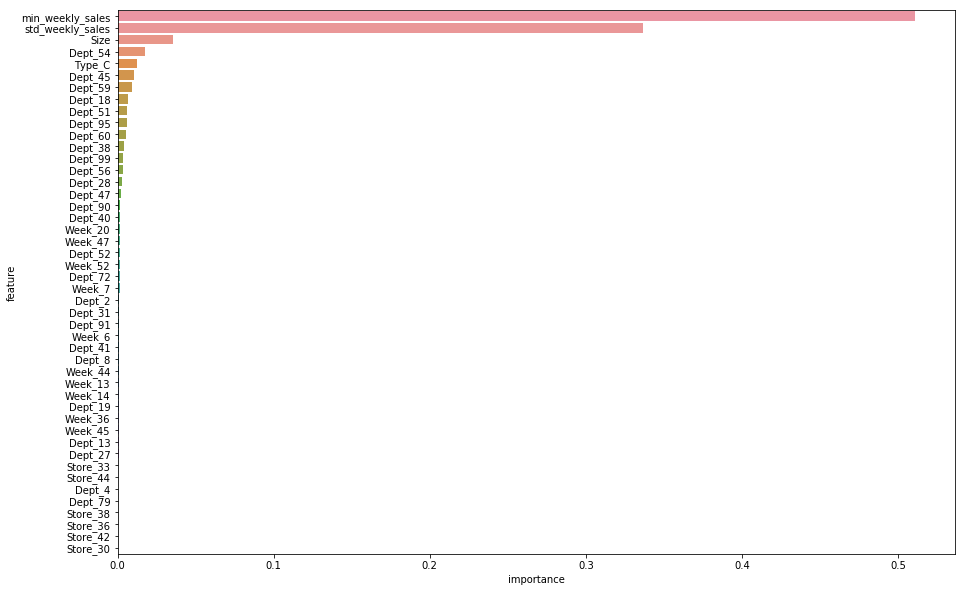

In [204]:
plt.subplots(figsize = (15,10))
indices = np.argsort(radm_reg.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
    feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_reg.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [ ]:
--------------------------------------------------------------------------------------------------------------------------

### XGBoost

In [171]:
from xgboost import XGBRegressor

In [104]:
#All Columns
xgb_estimator = XGBRegressor(n_estimators=200,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)

In [118]:
xgb_estimator.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbose=1)

In [119]:
xgb_estimator.predict(X_train)

array([151.99017  , 222.87889  , 111.90703  , ...,   6.6274877,
         7.201038 ,   7.7044587], dtype=float32)

In [120]:
xgb_estimator.predict(X_test)

array([147.85052  , 220.482    ,  99.574104 , ...,   3.6899378,
         6.6872764,   3.0229213], dtype=float32)

In [121]:
from sklearn import metrics

In [122]:
metrics.r2_score(y_train,pd.DataFrame(xgb_estimator.predict(X_train)))

0.9901943622501884

In [123]:
metrics.r2_score(y_test,pd.DataFrame(xgb_estimator.predict(X_test)))

0.9880440715741198

In [124]:
metrics.mean_squared_error(y_train,pd.DataFrame(xgb_estimator.predict(X_train)))

51.87518046936069

In [125]:
metrics.mean_squared_error(y_test,pd.DataFrame(xgb_estimator.predict(X_test)))

65.26065580557542

### Tuning parameters for XGBoost

In [172]:
xgb_estimator = XGBRegressor( learning_rate=0.01,
                               n_estimators=1000,
                               max_depth=5,
                               min_child_weight=1,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1)

In [173]:
xgb_estimator.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=1, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpa=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8, verbose=1)

In [174]:
metrics.r2_score(y_train,pd.DataFrame(xgb_estimator.predict(X_train)))

0.9903486056320079

In [175]:
metrics.r2_score(y_test,pd.DataFrame(xgb_estimator.predict(X_test)))

0.9878553050592838

In [176]:
metrics.mean_squared_error(y_train,pd.DataFrame(xgb_estimator.predict(X_train)))

51.05918017725918

In [177]:
metrics.mean_squared_error(y_test,pd.DataFrame(xgb_estimator.predict(X_test)))

66.29102551953781

In [178]:
#Train Data
MAPE_train = np.mean(np.abs(train.Weekly_Sales - (np.square(xgb_estimator.predict(X_train))))/train.Weekly_Sales )
print(MAPE_train)

RMSE_train = metrics.mean_squared_error(train.Weekly_Sales ,np.square(xgb_estimator.predict(X_train)))
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.Weekly_Sales ,np.square(xgb_estimator.predict(X_train)))
print(Corr_train)


0.6025996614053998
4814375.54672258
(0.9943278107117755, 0.0)


In [179]:
#Test Data
MAPE_test = np.mean(np.abs(test.Weekly_Sales - np.square(xgb_estimator.predict(X_test)))/test.Weekly_Sales )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.Weekly_Sales ,np.square(xgb_estimator.predict(X_test)))
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.Weekly_Sales ,np.square(xgb_estimator.predict(X_test)))
print(Corr_test)

0.35658535827685894
7356781.602757149
(0.9920570063526731, 0.0)


# IMPORTANT STEP

In [278]:
final_ans = pd.DataFrame(np.square(xgb_estimator.predict(data_test_final)))

In [279]:
final_ans.columns = ['Weekly_Sales']

In [280]:
final_ans

,Weekly_Sales
0,34907.000000
1,47007.453125
2,9323.658203
3,37438.796875
4,26666.292969
5,5602.942383
6,20827.388672
7,36535.550781
8,48317.292969
9,30597.480469


### Decile Analysis

In [316]:
X_train['Weekly_Sales'] = np.square(y_train)

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [317]:
X_train.head()

,Christmas,Month_12,Qurater_4,ThanksGiving,Week_38,Dept_13,Dept_2,Dept_27,Dept_28,Dept_38,...,Dept_92,Dept_95,Size,Type_B,Type_C,median_weekly_sales,std_weekly_sales,pred,Deciles,Weekly_Sales
0,0.0,0,0,0.0,0,0,0,0,0,0,...,0,0,151315.0,0,0,23510.49,1634.107271,22854.015625,7,24924.50
1,0.0,0,0,0.0,0,0,1,0,0,0,...,0,0,151315.0,0,0,50605.27,3746.598950,50358.882812,9,50605.27
2,0.0,0,0,0.0,0,0,0,0,0,0,...,0,0,151315.0,0,0,12485.78,1365.263444,12382.427734,6,13740.12
3,0.0,0,0,0.0,0,0,0,0,0,0,...,0,0,151315.0,0,0,39954.04,2455.486974,39071.503906,8,39954.04
4,0.0,0,0,0.0,0,0,0,0,0,0,...,0,0,151315.0,0,0,31280.62,2046.203644,30507.513672,8,32229.38


In [318]:
X_test['Weekly_Sales'] = np.square(y_test)

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [319]:
X_test.head()

,Christmas,Month_12,Qurater_4,ThanksGiving,Week_38,Dept_13,Dept_2,Dept_27,Dept_28,Dept_38,...,Dept_91,Dept_92,Dept_95,Size,Type_B,Type_C,median_weekly_sales,std_weekly_sales,pred,Weekly_Sales
0,0.0,0,1,0.0,0,0,0,0,0,0,...,0,0,0,151315.0,0,0,21904.47,1299.781196,21493.861328,20797.58
1,0.0,0,1,0.0,0,0,1,0,0,0,...,0,0,0,151315.0,0,0,48577.08,1765.199770,48494.113281,49880.69
2,0.0,0,1,0.0,0,0,0,0,0,0,...,0,0,0,151315.0,0,0,10081.80,952.369933,9940.611328,9977.96
3,0.0,0,1,0.0,0,0,0,0,0,0,...,0,0,0,151315.0,0,0,37397.63,1771.527195,36114.730469,37397.63
4,0.0,0,1,0.0,0,0,0,0,0,0,...,0,0,0,151315.0,0,0,25508.81,5254.475906,24174.660156,30352.06


In [304]:
X_train['pred'] = pd.DataFrame(np.square(xgb_estimator.predict(X_train)))
X_train.head()

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Christmas,Month_12,Qurater_4,ThanksGiving,Week_38,Dept_13,Dept_2,Dept_27,Dept_28,Dept_38,...,Dept_90,Dept_91,Dept_92,Dept_95,Size,Type_B,Type_C,median_weekly_sales,std_weekly_sales,pred
0,0.0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,151315.0,0,0,23510.49,1634.107271,22854.015625
1,0.0,0,0,0.0,0,0,1,0,0,0,...,0,0,0,0,151315.0,0,0,50605.27,3746.598950,50358.882812
2,0.0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,151315.0,0,0,12485.78,1365.263444,12382.427734
3,0.0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,151315.0,0,0,39954.04,2455.486974,39071.503906
4,0.0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,151315.0,0,0,31280.62,2046.203644,30507.513672


In [305]:
X_test['pred'] = pd.DataFrame(np.square(xgb_estimator.predict(X_test)))
X_test.head()

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Christmas,Month_12,Qurater_4,ThanksGiving,Week_38,Dept_13,Dept_2,Dept_27,Dept_28,Dept_38,...,Dept_90,Dept_91,Dept_92,Dept_95,Size,Type_B,Type_C,median_weekly_sales,std_weekly_sales,pred
0,0.0,0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,151315.0,0,0,21904.47,1299.781196,21493.861328
1,0.0,0,1,0.0,0,0,1,0,0,0,...,0,0,0,0,151315.0,0,0,48577.08,1765.199770,48494.113281
2,0.0,0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,151315.0,0,0,10081.80,952.369933,9940.611328
3,0.0,0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,151315.0,0,0,37397.63,1771.527195,36114.730469
4,0.0,0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,151315.0,0,0,25508.81,5254.475906,24174.660156


In [306]:
X_train['Deciles'] = pd.qcut(X_train['pred'],10, labels=False)
X_train.head()

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Christmas,Month_12,Qurater_4,ThanksGiving,Week_38,Dept_13,Dept_2,Dept_27,Dept_28,Dept_38,...,Dept_91,Dept_92,Dept_95,Size,Type_B,Type_C,median_weekly_sales,std_weekly_sales,pred,Deciles
0,0.0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,151315.0,0,0,23510.49,1634.107271,22854.015625,7
1,0.0,0,0,0.0,0,0,1,0,0,0,...,0,0,0,151315.0,0,0,50605.27,3746.598950,50358.882812,9
2,0.0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,151315.0,0,0,12485.78,1365.263444,12382.427734,6
3,0.0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,151315.0,0,0,39954.04,2455.486974,39071.503906,8
4,0.0,0,0,0.0,0,0,0,0,0,0,...,0,0,0,151315.0,0,0,31280.62,2046.203644,30507.513672,8


In [320]:
avg_actual = X_train[['Deciles','Weekly_Sales']].groupby(X_train.Deciles).mean().sort_index(ascending=False)['Weekly_Sales']
avg_pred = X_train[['Deciles','pred']].groupby(X_train.Deciles).mean().sort_index(ascending=False)['pred']

In [321]:
Decile_analysis_train = pd.concat([avg_actual, avg_pred], axis=1)

In [322]:
Decile_analysis_train

,Weekly_Sales,pred
Deciles,,
9,66157.117806,65908.015625
8,32691.682199,32564.201172
7,20358.827122,20264.144531
6,13778.551477,13726.881836
5,9411.111841,9372.607422
4,6275.562916,6236.150391
3,3974.069300,3936.142822
2,2179.449492,2147.797852
1,819.382297,793.720154


In [323]:
X_test['Deciles'] = pd.qcut(X_test['pred'],10, labels=False)

avg_actual_test = X_test[['Deciles','Weekly_Sales']].groupby(X_test.Deciles).mean().sort_index(ascending=False)['Weekly_Sales']
avg_pred_test = X_test[['Deciles','pred']].groupby(X_test.Deciles).mean().sort_index(ascending=False)['pred']

Decile_analysis_test = pd.concat([avg_actual_test, avg_pred_test], axis=1)

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [324]:
Decile_analysis_test

,Weekly_Sales,pred
Deciles,,
9,67461.582002,65907.914062
8,33462.608110,32336.810547
7,20607.861635,20061.556641
6,13877.708253,13548.315430
5,9356.464373,9211.173828
4,6182.337069,6057.993164
3,3815.708582,3792.416504
2,2088.762335,2049.919434
1,788.072927,740.752258


In [330]:
Decile_analysis_train.to_excel("DecileAnaysisTrainXgBoost.xlsx")

In [331]:
Decile_analysis_test.to_excel("DecileAnalysisTestXGBoost.xlsx")

### KNN

In [180]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [139]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

knn_reg = GridSearchCV(KNeighborsRegressor(),
                   tuned_parameters,
                   cv=5,
                   scoring='neg_mean_squared_error')
# scoring = "r2"  --> metrics.r2_score
# scoring = ‘neg_mean_squared_error" ---> metrics.mean_squared_error

In [140]:
knn_reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [3, 5, 7, 9, 11]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [141]:
knn_reg.best_score_

-75.60179071561348

In [142]:
knn_reg.best_params_

{'n_neighbors': 11}

In [181]:
#Building for the n_neighbors = 11
knn_reg = KNeighborsRegressor( n_neighbors = 11 )

In [182]:
knn_reg.fit( X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=11, p=2,
          weights='uniform')

In [183]:
metrics.r2_score(y_train,knn_reg.predict(X_train))

0.9910400994889146

In [184]:
metrics.r2_score(y_test,knn_reg.predict(X_test))

0.9856602496570006

In [185]:
metrics.mean_squared_error(y_train,knn_reg.predict(X_train))

47.400940954503795

In [186]:
metrics.mean_squared_error(y_test,knn_reg.predict(X_test))

78.2725923188574

In [187]:
#Train Data
MAPE_train = np.mean(np.abs(train.Weekly_Sales - (np.square(knn_reg.predict(X_train))))/train.Weekly_Sales )
print(MAPE_train)

RMSE_train = metrics.mean_squared_error(train.Weekly_Sales ,np.square(knn_reg.predict(X_train)))
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.Weekly_Sales ,np.square(knn_reg.predict(X_train)))
print(Corr_train)

0.40831459344531507
4654524.07717985
(0.9945093654079216, 0.0)


In [188]:
#Test Data
MAPE_test = np.mean(np.abs(test.Weekly_Sales - np.square(knn_reg.predict(X_test)))/test.Weekly_Sales )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.Weekly_Sales ,np.square(knn_reg.predict(X_test)))
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.Weekly_Sales ,np.square(knn_reg.predict(X_test)))
print(Corr_test)

0.36168078517513375
8031192.357646426
(0.9911760966105841, 0.0)


### Decision Trees

In [190]:
from sklearn import metrics
from sklearn.tree import  DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [191]:
reg_tree = DecisionTreeRegressor( max_depth = 4 )
reg_tree = reg_tree.fit(X_train, y_train)

In [192]:
pd.DataFrame(reg_tree.predict(X_train)).head()

,0
0,153.254209
1,220.048822
2,117.035971
3,195.517912
4,174.414514


In [197]:
pred = pd.DataFrame(reg_tree.predict( X_train ), index=X_train.index)

In [198]:
tree_train_pred = pd.concat([y_train, pred], axis=1)

In [199]:
tree_train_pred.columns = ['actual', 'predicted']

In [200]:
tree_train_pred

,actual,predicted
0,157.874951,153.254209
1,224.956151,220.048822
2,117.218258,117.035971
3,199.885067,195.517912
4,179.525430,174.414514
5,75.822358,68.535673
6,145.203581,134.592387
7,200.322265,195.517912
8,130.119138,134.592387
9,175.275497,174.414514


In [201]:
pred_test = pd.DataFrame(reg_tree.predict( X_test ), index=X_test.index)
tree_test_pred = pd.concat([y_test, pred_test], axis=1)
tree_test_pred.columns = ['actual', 'predicted']
tree_test_pred.head()

,actual,predicted
0,144.213661,153.254209
1,223.339853,220.048822
2,99.889739,100.129734
3,193.384668,195.517912
4,174.218426,153.254209


In [202]:
print("Train r2_score:")
print(metrics.r2_score( tree_train_pred.actual, tree_train_pred.predicted ))

print("Test r2_score:")
print(metrics.r2_score( tree_test_pred.actual, tree_test_pred.predicted ))

Train r2_score:
0.9838641368434825
Test r2_score:
0.9848838961430855


#### Tuning Parameters for DT

In [207]:
param_grid = {'max_depth': np.arange(3, 8),
             'max_features': np.arange(8,15)}

In [208]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5)
tree.fit( X_train, y_train )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4, 5, 6, 7]), 'max_features': array([ 8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [209]:
tree.best_score_

0.9733237940020109

In [210]:
tree.best_params_

{'max_depth': 7, 'max_features': 13}

In [211]:
reg_tree = DecisionTreeRegressor(max_depth = 7, max_features = 13)

In [212]:
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=13,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [213]:
metrics.r2_score(y_train,reg_tree.predict(X_train))

0.9820250537307208

In [217]:
metrics.r2_score(y_test,reg_tree.predict(X_test))

0.9825323328721242

In [218]:
metrics.mean_squared_error(y_train,reg_tree.predict(X_train))

95.09361914413364

In [219]:
metrics.mean_squared_error(y_test,reg_tree.predict(X_test))

95.34612215401776

In [220]:
#Train Data
MAPE_train = np.mean(np.abs(train.Weekly_Sales - (np.square(reg_tree.predict(X_train))))/train.Weekly_Sales )
print(MAPE_train)

RMSE_train = metrics.mean_squared_error(train.Weekly_Sales ,np.square(reg_tree.predict(X_train)))
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.Weekly_Sales ,np.square(reg_tree.predict(X_train)))
print(Corr_train)

0.6020309239751558
13679718.324725945
(0.9837832962255297, 0.0)


In [221]:
#Test Data
MAPE_test = np.mean(np.abs(test.Weekly_Sales - np.square(reg_tree.predict(X_test)))/test.Weekly_Sales )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.Weekly_Sales ,np.square(reg_tree.predict(X_test)))
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.Weekly_Sales ,np.square(reg_tree.predict(X_test)))
print(Corr_test)

0.37689961845996095
14037177.938868377
(0.984497726222375, 0.0)


### Feature importance from Decision Trees

In [222]:
reg_tree.feature_importances_

array([5.03813716e-06, 3.93122447e-07, 0.00000000e+00, 4.46770669e-09,
       0.00000000e+00, 3.97763393e-05, 0.00000000e+00, 4.99081504e-06,
       3.33517577e-05, 1.13813596e-05, 1.49733008e-05, 1.23139910e-05,
       0.00000000e+00, 9.51885383e-06, 3.08388069e-05, 0.00000000e+00,
       0.00000000e+00, 1.56999832e-04, 6.58708203e-05, 5.74929867e-05,
       6.27847203e-04, 1.70236607e-04, 8.89368190e-04, 1.39976761e-05,
       1.00680266e-05, 9.67490878e-01, 3.03546593e-02])

In [223]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train.columns, reg_tree.feature_importances_)]
feature_map

[('Christmas', 5.038137162941778e-06),
 ('Month_12', 3.931224471685164e-07),
 ('Qurater_4', 0.0),
 ('ThanksGiving', 4.467706689983729e-09),
 ('Week_38', 0.0),
 ('Dept_13', 3.977633931341601e-05),
 ('Dept_2', 0.0),
 ('Dept_27', 4.990815041045034e-06),
 ('Dept_28', 3.3351757660456347e-05),
 ('Dept_38', 1.1381359611177643e-05),
 ('Dept_40', 1.4973300814254354e-05),
 ('Dept_41', 1.2313990966422331e-05),
 ('Dept_52', 0.0),
 ('Dept_54', 9.518853832906489e-06),
 ('Dept_59', 3.0838806902567256e-05),
 ('Dept_60', 0.0),
 ('Dept_72', 0.0),
 ('Dept_8', 0.0001569998321456247),
 ('Dept_90', 6.587082027567532e-05),
 ('Dept_91', 5.749298669556852e-05),
 ('Dept_92', 0.0006278472029837633),
 ('Dept_95', 0.00017023660718390105),
 ('Size', 0.0008893681896989084),
 ('Type_B', 1.3997676060659979e-05),
 ('Type_C', 1.0068026574096064e-05),
 ('median_weekly_sales', 0.967490878437464),
 ('std_weekly_sales', 0.030354659269458805)]

In [224]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

,Feature,importance
25,median_weekly_sales,9.674909e-01
26,std_weekly_sales,3.035466e-02
22,Size,8.893682e-04
20,Dept_92,6.278472e-04
21,Dept_95,1.702366e-04
17,Dept_8,1.569998e-04
18,Dept_90,6.587082e-05
19,Dept_91,5.749299e-05
5,Dept_13,3.977634e-05
8,Dept_28,3.335176e-05


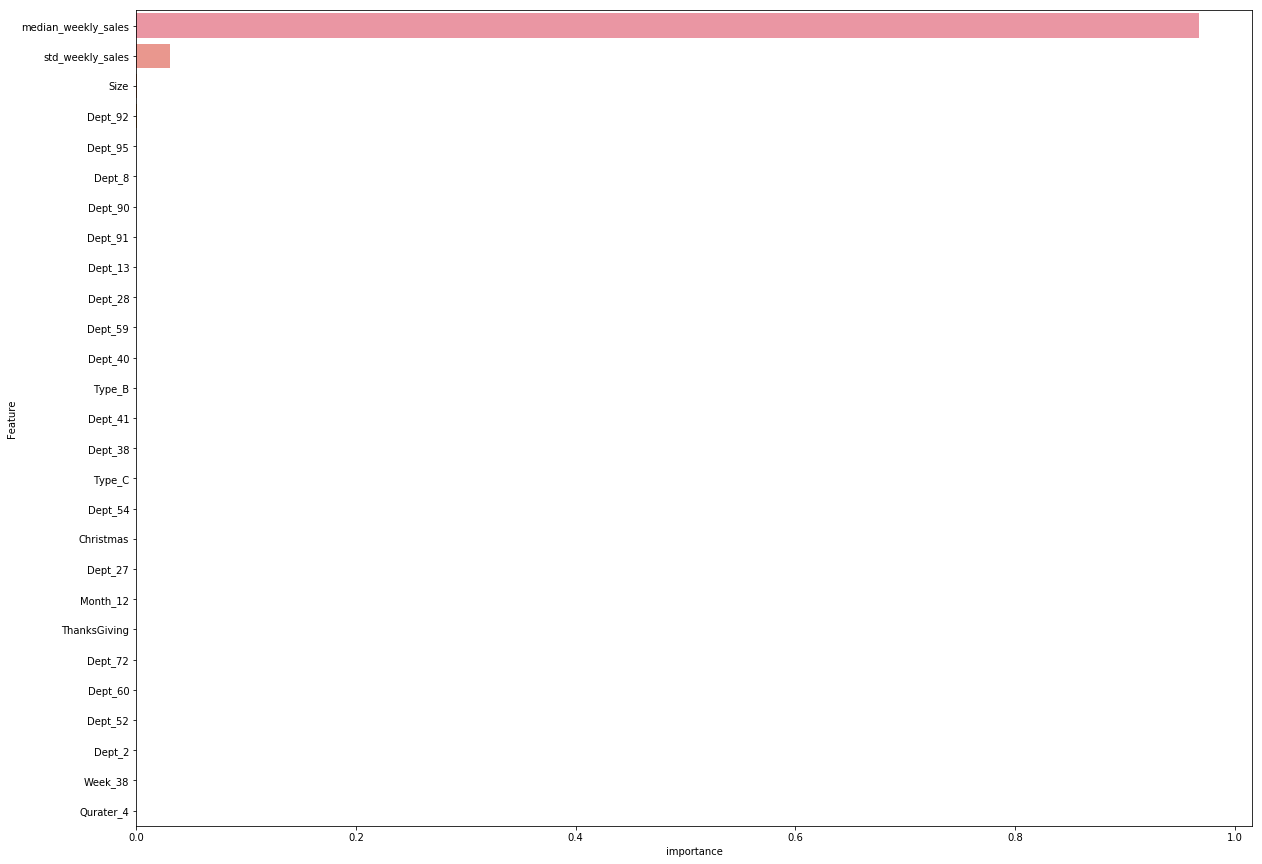

In [226]:
plt.subplots(figsize=(20,15))
sns.barplot(y = 'Feature',x= 'importance',data= Feature_importance)

### Prediction on New Data Set

In [157]:
data_test = pd.read_csv(r"E:\DSP\DSP_22nd Nov\Machine Learning\FInal Class\Case Studies & FInal Projects\2\data\test.csv")

In [158]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
Store        115064 non-null int64
Dept         115064 non-null int64
Date         115064 non-null object
IsHoliday    115064 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [159]:
features = pd.read_csv(r"E:\DSP\DSP_22nd Nov\Machine Learning\FInal Class\Case Studies & FInal Projects\2\data\features.csv")

In [160]:
data_test = pd.merge(left = data_test,right=features,how="inner")

In [161]:
data_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [162]:
data_test.tail()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
115063,45,98,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [163]:
data_test = pd.merge(left = data_test,right=stores,how="inner")

In [164]:
data_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [165]:
data_test.groupby(["Store","Dept"])[["Size"]].count()

Size
Store Dept      
1     1       39
      2       39
      3       39
      4       39
      5       39
      6       39
      7       39
      8       39
      9       39
      10      39
      11      39
      12      39
      13      39
      14      39
      16      39
      17      39
      18      32
      19      39
      20      39
      21      39
      22      39
      23      39
      24      39
      25      39
      26      39
      27      39
      28      39
      29      39
      30      39
      31      39
...          ...
45    45      10
      46      39
      47       1
      49      29
      52      39
      54      20
      55      39
      56      39
      58      36
      59      39
      60      39
      67      39
      71      39
      72      39
      74      39
      79      39
      80      39
      81      39
      82      39
      83      39
      85      39
      87      39
      90      39
      91      39
      92      39
      93      39
      94      39
      95      39
      97      39
      98      39

[3169 rows x 1 columns]

In [166]:
data_test.dtypes

Store             int64
Dept              int64
Date             object
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [167]:
data_test.Date = pd.to_datetime(data_test.Date)

In [168]:
data_test.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

In [169]:
data_test.shape

(115064, 15)

In [170]:
data_test["Week"] = data_test.Date.dt.week

In [171]:
data_test["Month"] = data_test.Date.dt.month

In [172]:
data_test["Year"] = data_test.Date.dt.year

In [173]:
data_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012


In [174]:
data_test.tail()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,30,7,2013
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,30,7,2013
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,30,7,2013
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,30,7,2013
115063,45,98,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,30,7,2013


In [175]:
data_test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
Week                0
Month               0
Year                0
dtype: int64

In [177]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(0)
    return x

In [178]:
data_test = data_test.apply(lambda x: Missing_imputation(x))

In [179]:
data_test.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Week            0
Month           0
Year            0
dtype: int64

In [180]:
data_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,44,11,2012


In [183]:
a = data[['Store','Dept','Week','median_weekly_sales','std_weekly_sales']][(data.Week >= 44) & (data.Year == 2011)]

In [184]:
a

,Store,Dept,Week,median_weekly_sales,std_weekly_sales
8259,1,1,44,37062.470,3993.159273
8261,1,2,44,46847.525,659.157870
8263,1,3,44,9507.210,449.734055
8265,1,4,44,38667.695,971.769778
8267,1,5,44,27929.940,5693.807650
8269,1,6,44,5630.010,838.656927
8271,1,7,44,21659.770,3568.329518
8273,1,8,44,36571.030,549.351258
8275,1,9,44,49735.040,1330.322414
8277,1,10,44,31566.245,31.699597


In [185]:
x = pd.merge(left=data_test,right=a,on=['Store','Dept','Week'],how='inner')

In [186]:
x

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year,median_weekly_sales,std_weekly_sales
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,37062.470,3993.159273
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,46847.525,659.157870
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,9507.210,449.734055
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,38667.695,971.769778
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,27929.940,5693.807650
5,1,6,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,5630.010,838.656927
6,1,7,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,21659.770,3568.329518
7,1,8,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,36571.030,549.351258
8,1,9,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,49735.040,1330.322414
9,1,10,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,31566.245,31.699597


In [187]:
data_test.tail()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,0.0,0.0,B,118221,30,7,2013
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,0.0,0.0,B,118221,30,7,2013
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,0.0,0.0,B,118221,30,7,2013
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,0.0,0.0,B,118221,30,7,2013
115063,45,98,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,0.0,0.0,B,118221,30,7,2013


In [188]:
data.Week[(data.Month == 7)& (data.Year == 2012)]

4642      27
4645      27
4648      27
4651      27
4654      27
4657      27
4660      27
4663      27
4666      27
4669      27
4672      27
4675      27
4678      27
4681      27
4684      27
4687      27
4690      27
4693      27
4696      27
4699      27
4702      27
4705      27
4708      27
4711      27
4714      27
4717      27
4720      27
4723      27
4726      27
4729      27
          ..
417035    30
417038    30
417041    30
417044    30
417047    30
417050    30
417053    30
417056    30
417059    30
417062    30
417065    30
417068    30
417071    30
417074    30
417077    30
417080    30
417083    30
417086    30
417089    30
417092    30
421452    27
421454    27
421456    28
421459    28
421461    29
421463    29
421465    29
421467    30
421469    30
421564    27
Name: Week, Length: 11798, dtype: int64

In [189]:
data_test.Week[(data_test.Month == 7)& (data_test.Year == 2013)]

2502      27
2503      27
2504      27
2505      27
2506      27
2507      27
2508      27
2509      27
2510      27
2511      27
2512      27
2513      27
2514      27
2515      27
2516      27
2517      27
2518      27
2519      27
2520      27
2521      27
2522      27
2523      27
2524      27
2525      27
2526      27
2527      27
2528      27
2529      27
2530      27
2531      27
          ..
115034    30
115035    30
115036    30
115037    30
115038    30
115039    30
115040    30
115041    30
115042    30
115043    30
115044    30
115045    30
115046    30
115047    30
115048    30
115049    30
115050    30
115051    30
115052    30
115053    30
115054    30
115055    30
115056    30
115057    30
115058    30
115059    30
115060    30
115061    30
115062    30
115063    30
Name: Week, Length: 11732, dtype: int64

In [190]:
b = data[['Store','Dept','Week','median_weekly_sales','std_weekly_sales']][(data.Week <=30) & (data.Year == 2012)]

In [191]:
88908+26948

115856

In [192]:
b

,Store,Dept,Week,median_weekly_sales,std_weekly_sales
2,1,1,5,23510.49,1634.107271
5,1,2,5,50605.27,3746.598950
8,1,3,5,12485.78,1365.263444
11,1,4,5,39954.04,2455.486974
14,1,5,5,31280.62,2046.203644
17,1,6,5,3981.09,1253.809780
20,1,7,5,17239.86,2440.689808
23,1,8,5,40069.47,116.960801
26,1,9,5,18799.82,1298.581458
29,1,10,5,33036.92,1497.457026


In [193]:
y = pd.merge(left=data_test,right=b,on=['Store','Dept','Week'],how='inner')

In [194]:
x.columns  # Year

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Week', 'Month', 'Year',
       'median_weekly_sales', 'std_weekly_sales'],
      dtype='object')

In [195]:
y.columns # Year

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Week', 'Month', 'Year',
       'median_weekly_sales', 'std_weekly_sales'],
      dtype='object')

In [196]:
x.drop(columns=['Year'],inplace=True)

In [197]:
x.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Week', 'Month', 'median_weekly_sales',
       'std_weekly_sales'],
      dtype='object')

In [198]:
y.drop(columns=['Year'],inplace=True)

In [199]:
y.columns


Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Week', 'Month', 'median_weekly_sales',
       'std_weekly_sales'],
      dtype='object')

In [200]:
x['Year'] = '2012'

In [201]:
x.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Week', 'Month', 'median_weekly_sales',
       'std_weekly_sales', 'Year'],
      dtype='object')

In [202]:
x

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,median_weekly_sales,std_weekly_sales,Year
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,37062.470,3993.159273,2012
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,46847.525,659.157870,2012
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,9507.210,449.734055,2012
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,38667.695,971.769778,2012
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,27929.940,5693.807650,2012
5,1,6,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,5630.010,838.656927,2012
6,1,7,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,21659.770,3568.329518,2012
7,1,8,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,36571.030,549.351258,2012
8,1,9,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,49735.040,1330.322414,2012
9,1,10,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,31566.245,31.699597,2012


In [203]:
y['Year'] = '2013'

In [204]:
y.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Week', 'Month', 'median_weekly_sales',
       'std_weekly_sales', 'Year'],
      dtype='object')

In [205]:
y

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,median_weekly_sales,std_weekly_sales,Year
0,1,1,2013-01-04,False,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,A,151315,1,1,16275.965,412.561451,2013
1,1,2,2013-01-04,False,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,A,151315,1,1,43841.835,904.453213,2013
2,1,3,2013-01-04,False,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,A,151315,1,1,14867.095,1330.852744,2013
3,1,4,2013-01-04,False,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,A,151315,1,1,39436.780,2105.735710,2013
4,1,5,2013-01-04,False,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,A,151315,1,1,22902.750,287.170206,2013
5,1,6,2013-01-04,False,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,A,151315,1,1,2520.700,1618.638133,2013
6,1,7,2013-01-04,False,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,A,151315,1,1,14946.960,3633.397484,2013
7,1,8,2013-01-04,False,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,A,151315,1,1,36698.230,139.681874,2013
8,1,9,2013-01-04,False,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,A,151315,1,1,18418.545,3233.832656,2013
9,1,10,2013-01-04,False,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,A,151315,1,1,27213.800,3837.510928,2013


In [206]:
x = x[['Store','Dept','Week','Year','median_weekly_sales','std_weekly_sales']]

In [207]:
x.columns

Index(['Store', 'Dept', 'Week', 'Year', 'median_weekly_sales',
       'std_weekly_sales'],
      dtype='object')

In [208]:
x.dtypes

Store                    int64
Dept                     int64
Week                     int64
Year                    object
median_weekly_sales    float64
std_weekly_sales       float64
dtype: object

In [209]:
data_test.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Week                     int64
Month                    int64
Year                     int64
dtype: object

In [210]:
y = y[['Store','Dept','Week','Year','median_weekly_sales','std_weekly_sales']]

In [211]:
y.columns

Index(['Store', 'Dept', 'Week', 'Year', 'median_weekly_sales',
       'std_weekly_sales'],
      dtype='object')

In [212]:
data_test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Week', 'Month', 'Year'],
      dtype='object')

In [213]:
x

,Store,Dept,Week,Year,median_weekly_sales,std_weekly_sales
0,1,1,44,2012,37062.470,3993.159273
1,1,2,44,2012,46847.525,659.157870
2,1,3,44,2012,9507.210,449.734055
3,1,4,44,2012,38667.695,971.769778
4,1,5,44,2012,27929.940,5693.807650
5,1,6,44,2012,5630.010,838.656927
6,1,7,44,2012,21659.770,3568.329518
7,1,8,44,2012,36571.030,549.351258
8,1,9,44,2012,49735.040,1330.322414
9,1,10,44,2012,31566.245,31.699597


In [214]:
x.Year = x.Year.astype(int)

C:\Users\Akhtar\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [215]:
y.Year = y.Year.astype(int)

In [216]:
x.std_weekly_sales.fillna(x.std_weekly_sales.mean(),inplace=True)

C:\Users\Akhtar\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [217]:
y.std_weekly_sales.fillna(y.std_weekly_sales.mean(),inplace=True)

In [218]:
x.isnull().sum()

Store                  0
Dept                   0
Week                   0
Year                   0
median_weekly_sales    0
std_weekly_sales       0
dtype: int64

In [219]:
y.isnull().sum()

Store                  0
Dept                   0
Week                   0
Year                   0
median_weekly_sales    0
std_weekly_sales       0
dtype: int64

In [220]:
data_test = pd.merge(left=data_test,right=x,on=['Year','Week','Store','Dept'],how='left')

In [221]:
data_test = pd.merge(left=data_test,right=y,on=['Year','Week','Store','Dept'],how='left')

In [222]:
data_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Unemployment,Type,Size,Week,Month,Year,median_weekly_sales_x,std_weekly_sales_x,median_weekly_sales_y,std_weekly_sales_y
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,37062.470,3993.159273,NaN,NaN
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,46847.525,659.157870,NaN,NaN
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,9507.210,449.734055,NaN,NaN
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,38667.695,971.769778,NaN,NaN
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,27929.940,5693.807650,NaN,NaN
5,1,6,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,5630.010,838.656927,NaN,NaN
6,1,7,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,21659.770,3568.329518,NaN,NaN
7,1,8,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,36571.030,549.351258,NaN,NaN
8,1,9,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,49735.040,1330.322414,NaN,NaN
9,1,10,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,31566.245,31.699597,NaN,NaN


In [223]:
data_test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Week', 'Month', 'Year',
       'median_weekly_sales_x', 'std_weekly_sales_x', 'median_weekly_sales_y',
       'std_weekly_sales_y'],
      dtype='object')

In [224]:
data_test.isnull().sum()

Store                        0
Dept                         0
Date                         0
IsHoliday                    0
Temperature                  0
Fuel_Price                   0
MarkDown1                    0
MarkDown2                    0
MarkDown3                    0
MarkDown4                    0
MarkDown5                    0
CPI                          0
Unemployment                 0
Type                         0
Size                         0
Week                         0
Month                        0
Year                         0
median_weekly_sales_x    88753
std_weekly_sales_x       88753
median_weekly_sales_y    28352
std_weekly_sales_y       28352
dtype: int64

In [225]:
data_test.median_weekly_sales_x.fillna(0,inplace=True)

In [226]:
data_test.median_weekly_sales_y.fillna(0,inplace=True)

In [227]:
data_test.std_weekly_sales_x.fillna(0,inplace=True)

In [228]:
data_test.std_weekly_sales_y.fillna(0,inplace=True)

In [229]:
data_test.isnull().sum()

Store                    0
Dept                     0
Date                     0
IsHoliday                0
Temperature              0
Fuel_Price               0
MarkDown1                0
MarkDown2                0
MarkDown3                0
MarkDown4                0
MarkDown5                0
CPI                      0
Unemployment             0
Type                     0
Size                     0
Week                     0
Month                    0
Year                     0
median_weekly_sales_x    0
std_weekly_sales_x       0
median_weekly_sales_y    0
std_weekly_sales_y       0
dtype: int64

In [230]:
data_test.dtypes

Store                             int64
Dept                              int64
Date                     datetime64[ns]
IsHoliday                          bool
Temperature                     float64
Fuel_Price                      float64
MarkDown1                       float64
MarkDown2                       float64
MarkDown3                       float64
MarkDown4                       float64
MarkDown5                       float64
CPI                             float64
Unemployment                    float64
Type                             object
Size                              int64
Week                              int64
Month                             int64
Year                              int64
median_weekly_sales_x           float64
std_weekly_sales_x              float64
median_weekly_sales_y           float64
std_weekly_sales_y              float64
dtype: object

In [231]:
data_test['median_weekly_sales'] = data_test.median_weekly_sales_x + data_test.median_weekly_sales_y

In [232]:
data_test['std_weekly_sales'] = data_test.std_weekly_sales_x + data_test.std_weekly_sales_y

In [233]:
data_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Size,Week,Month,Year,median_weekly_sales_x,std_weekly_sales_x,median_weekly_sales_y,std_weekly_sales_y,median_weekly_sales,std_weekly_sales
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,151315,44,11,2012,37062.470,3993.159273,0.000,0.000000,37062.470,3993.159273
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,151315,44,11,2012,46847.525,659.157870,0.000,0.000000,46847.525,659.157870
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,151315,44,11,2012,9507.210,449.734055,0.000,0.000000,9507.210,449.734055
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,151315,44,11,2012,38667.695,971.769778,0.000,0.000000,38667.695,971.769778
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,151315,44,11,2012,27929.940,5693.807650,0.000,0.000000,27929.940,5693.807650
5,1,6,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,151315,44,11,2012,5630.010,838.656927,0.000,0.000000,5630.010,838.656927
6,1,7,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,151315,44,11,2012,21659.770,3568.329518,0.000,0.000000,21659.770,3568.329518
7,1,8,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,151315,44,11,2012,36571.030,549.351258,0.000,0.000000,36571.030,549.351258
8,1,9,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,151315,44,11,2012,49735.040,1330.322414,0.000,0.000000,49735.040,1330.322414
9,1,10,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,151315,44,11,2012,31566.245,31.699597,0.000,0.000000,31566.245,31.699597


In [236]:
data_test.drop(columns=['median_weekly_sales_x','median_weekly_sales_y','std_weekly_sales_y','std_weekly_sales_x'],axis=1,inplace=True)

In [237]:
data_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year,median_weekly_sales,std_weekly_sales
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,37062.470,3993.159273
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,46847.525,659.157870
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,9507.210,449.734055
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,38667.695,971.769778
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,27929.940,5693.807650
5,1,6,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,5630.010,838.656927
6,1,7,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,21659.770,3568.329518
7,1,8,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,36571.030,549.351258
8,1,9,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,49735.040,1330.322414
9,1,10,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012,31566.245,31.699597


In [238]:
data_test.isnull().sum()

Store                  0
Dept                   0
Date                   0
IsHoliday              0
Temperature            0
Fuel_Price             0
MarkDown1              0
MarkDown2              0
MarkDown3              0
MarkDown4              0
MarkDown5              0
CPI                    0
Unemployment           0
Type                   0
Size                   0
Week                   0
Month                  0
Year                   0
median_weekly_sales    0
std_weekly_sales       0
dtype: int64

In [239]:
data_test.dtypes

Store                           int64
Dept                            int64
Date                   datetime64[ns]
IsHoliday                        bool
Temperature                   float64
Fuel_Price                    float64
MarkDown1                     float64
MarkDown2                     float64
MarkDown3                     float64
MarkDown4                     float64
MarkDown5                     float64
CPI                           float64
Unemployment                  float64
Type                           object
Size                            int64
Week                            int64
Month                           int64
Year                            int64
median_weekly_sales           float64
std_weekly_sales              float64
dtype: object

In [240]:
data_test["ThanksGiving"] = np.where(data_test["Date"] == datetime(2012,11,23).date(),1,0)

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [242]:
data_test["Christmas"] = np.where(data_test["Date"] == datetime(2012,12,28).date(),1,0)

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [243]:
data_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Unemployment,Type,Size,Week,Month,Year,median_weekly_sales,std_weekly_sales,ThanksGiving,Christmas
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,37062.470,3993.159273,0,0
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,46847.525,659.157870,0,0
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,9507.210,449.734055,0,0
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,38667.695,971.769778,0,0
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,27929.940,5693.807650,0,0
5,1,6,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,5630.010,838.656927,0,0
6,1,7,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,21659.770,3568.329518,0,0
7,1,8,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,36571.030,549.351258,0,0
8,1,9,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,49735.040,1330.322414,0,0
9,1,10,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,...,6.573,A,151315,44,11,2012,31566.245,31.699597,0,0


In [244]:
data_test["Qurater"] = data_test.Date.dt.quarter

In [245]:
cat_var_names = ['Store','Dept','Type','Month','Qurater','Week']

In [246]:
data_test_cat = data_test[cat_var_names]

In [247]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

for c_feature in data_test_cat.columns:
    data_test_cat[c_feature] = data_test_cat[c_feature].astype('category')
    data_test_cat = create_dummies(data_test_cat , c_feature )

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [248]:
data_test_cat.head(10)

,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,...,Week_30,Week_44,Week_45,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [249]:
data_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Columns: 175 entries, Store_2 to Week_52
dtypes: uint8(175)
memory usage: 20.1 MB


In [250]:
data_test_cat.isnull().sum()

Store_2     0
Store_3     0
Store_4     0
Store_5     0
Store_6     0
Store_7     0
Store_8     0
Store_9     0
Store_10    0
Store_11    0
Store_12    0
Store_13    0
Store_14    0
Store_15    0
Store_16    0
Store_17    0
Store_18    0
Store_19    0
Store_20    0
Store_21    0
Store_22    0
Store_23    0
Store_24    0
Store_25    0
Store_26    0
Store_27    0
Store_28    0
Store_29    0
Store_30    0
Store_31    0
           ..
Week_10     0
Week_11     0
Week_12     0
Week_13     0
Week_14     0
Week_15     0
Week_16     0
Week_17     0
Week_18     0
Week_19     0
Week_20     0
Week_21     0
Week_22     0
Week_23     0
Week_24     0
Week_25     0
Week_26     0
Week_27     0
Week_28     0
Week_29     0
Week_30     0
Week_44     0
Week_45     0
Week_46     0
Week_47     0
Week_48     0
Week_49     0
Week_50     0
Week_51     0
Week_52     0
Length: 175, dtype: int64

In [251]:
num_var_names = ['median_weekly_sales','std_weekly_sales','Size','Christmas','ThanksGiving']

In [252]:
data_test_num = data_test[num_var_names]

In [253]:
data_test_num.head()

,median_weekly_sales,std_weekly_sales,Size,Christmas,ThanksGiving
0,37062.470,3993.159273,151315,0,0
1,46847.525,659.157870,151315,0,0
2,9507.210,449.734055,151315,0,0
3,38667.695,971.769778,151315,0,0
4,27929.940,5693.807650,151315,0,0


In [254]:
data_test_num.isnull().sum()

median_weekly_sales    0
std_weekly_sales       0
Size                   0
Christmas              0
ThanksGiving           0
dtype: int64

In [255]:
data_test_combine = pd.concat([data_test_num,data_test_cat],axis=1)

In [256]:
data_test_combine.head()

,median_weekly_sales,std_weekly_sales,Size,Christmas,ThanksGiving,Store_2,Store_3,Store_4,Store_5,Store_6,...,Week_30,Week_44,Week_45,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52
0,37062.470,3993.159273,151315,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,46847.525,659.157870,151315,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,9507.210,449.734055,151315,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,38667.695,971.769778,151315,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,27929.940,5693.807650,151315,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [257]:
data_test_combine.isnull().sum()

median_weekly_sales    0
std_weekly_sales       0
Size                   0
Christmas              0
ThanksGiving           0
Store_2                0
Store_3                0
Store_4                0
Store_5                0
Store_6                0
Store_7                0
Store_8                0
Store_9                0
Store_10               0
Store_11               0
Store_12               0
Store_13               0
Store_14               0
Store_15               0
Store_16               0
Store_17               0
Store_18               0
Store_19               0
Store_20               0
Store_21               0
Store_22               0
Store_23               0
Store_24               0
Store_25               0
Store_26               0
                      ..
Week_10                0
Week_11                0
Week_12                0
Week_13                0
Week_14                0
Week_15                0
Week_16                0
Week_17                0
Week_18                0


In [258]:
data_test_combine.dtypes

median_weekly_sales    float64
std_weekly_sales       float64
Size                     int64
Christmas                int32
ThanksGiving             int32
Store_2                  uint8
Store_3                  uint8
Store_4                  uint8
Store_5                  uint8
Store_6                  uint8
Store_7                  uint8
Store_8                  uint8
Store_9                  uint8
Store_10                 uint8
Store_11                 uint8
Store_12                 uint8
Store_13                 uint8
Store_14                 uint8
Store_15                 uint8
Store_16                 uint8
Store_17                 uint8
Store_18                 uint8
Store_19                 uint8
Store_20                 uint8
Store_21                 uint8
Store_22                 uint8
Store_23                 uint8
Store_24                 uint8
Store_25                 uint8
Store_26                 uint8
                        ...   
Week_10                  uint8
Week_11 

In [268]:
# 'Week_38' is not present in Test Data
list_vars = ['Christmas','Month_12','Qurater_4','ThanksGiving','Dept_13','Week_38','Dept_2','Dept_27','Dept_28','Dept_38','Dept_40','Dept_41','Dept_52','Dept_54','Dept_59','Dept_60','Dept_72','Dept_8','Dept_90','Dept_91','Dept_92','Dept_95','Size','Type_B','Type_C','median_weekly_sales','std_weekly_sales']

In [264]:
data_test_final = data_test_combine[list_vars]

In [269]:
data_test_final['Week_38'] = 0

C:\Users\Akhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [270]:
data_test_final.head()

,Christmas,Month_12,Qurater_4,ThanksGiving,Dept_13,Dept_2,Dept_27,Dept_28,Dept_38,Dept_40,...,Dept_90,Dept_91,Dept_92,Dept_95,Size,Type_B,Type_C,median_weekly_sales,std_weekly_sales,Week_38
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,151315,0,0,37062.470,3993.159273,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,151315,0,0,46847.525,659.157870,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,151315,0,0,9507.210,449.734055,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,151315,0,0,38667.695,971.769778,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,151315,0,0,27929.940,5693.807650,0


In [273]:
data_test_final = data_test_final[['Christmas', 'Month_12', 'Qurater_4', 'ThanksGiving', 'Week_38', 'Dept_13', 'Dept_2', 'Dept_27', 'Dept_28', 'Dept_38', 'Dept_40', 'Dept_41', 'Dept_52', 'Dept_54', 'Dept_59', 'Dept_60', 'Dept_72', 'Dept_8', 'Dept_90', 'Dept_91', 'Dept_92', 'Dept_95', 'Size', 'Type_B', 'Type_C', 'median_weekly_sales', 'std_weekly_sales']]

In [274]:
data_test_final.head()

,Christmas,Month_12,Qurater_4,ThanksGiving,Week_38,Dept_13,Dept_2,Dept_27,Dept_28,Dept_38,...,Dept_8,Dept_90,Dept_91,Dept_92,Dept_95,Size,Type_B,Type_C,median_weekly_sales,std_weekly_sales
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,151315,0,0,37062.470,3993.159273
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,151315,0,0,46847.525,659.157870
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,151315,0,0,9507.210,449.734055
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,151315,0,0,38667.695,971.769778
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,151315,0,0,27929.940,5693.807650


In [326]:
final_res = pd.concat([data_test.Store.astype(str).str.cat(data_test.Dept.astype(str),sep='_')
               .str.cat(data_test.Date.astype(str),sep='_'),pd.DataFrame(np.square(xgb_estimator.predict(data_test_final)))],axis=1)

In [327]:
final_res.columns = ["Store_Dept_Date","Pred_Weekly_Sales"]

In [328]:
final_res.head()

,Store_Dept_Date,Pred_Weekly_Sales
0,1_1_2012-11-02,34907.000000
1,1_2_2012-11-02,47007.453125
2,1_3_2012-11-02,9323.658203
3,1_4_2012-11-02,37438.796875
4,1_5_2012-11-02,26666.292969


In [329]:
final_res.to_excel("FinalResult.xlsx")